# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [75]:
#Import the Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline

#Display all columns and 500 rows
# Adding code to see all the columns of data set
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',500)

# Reading and understanding the Data - EDA

In [76]:
df = pd.read_csv('train.csv')

In [77]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
#Check the shape of the dataset
df.shape

(1460, 81)

# Data Cleaning - Missing value treatment

In [79]:
#Check percentage of null values in each column

null_percent = round(df.isnull().sum()/len(df)*100,2)

missing_data = pd.DataFrame({'column_name':df.columns,'missing_percentage':null_percent})
missing_data

,column_name,missing_percentage
Id,Id,0.00
MSSubClass,MSSubClass,0.00
MSZoning,MSZoning,0.00
LotFrontage,LotFrontage,17.74
LotArea,LotArea,0.00
Street,Street,0.00
Alley,Alley,93.77
LotShape,LotShape,0.00
LandContour,LandContour,0.00
Utilities,Utilities,0.00


In [80]:
#After visual inspection of the comuns that have more than 90% null (NA) values, we found that they are actually not null values,
#NA in this context have some meaning, so we are not dropping these columns, but instead replacing the 'NA' with more meaningful
#value, these columns with current NA values and new values are as below:
# Alley---> NA --->NoAlley
# PoolQC --->NA ---> NoPool
# Fence ---> NA --->NoFence
# MiscFeature --->NA ---> NoMisc
# FireplaceQu ---> NA ---> NoFirePlace
# GarageFinish,GarageCond,GarageYrBlt,GarageQual,GarageType ---> NA ---> NoGarage
# BsmtFinType2, BsmtExposure,BsmtFinType1,BsmtQual,BsmtCond ---> NA ---> NoBsmt

df['Alley'].fillna('NoAlley',inplace = True)
df['PoolQC'].fillna('NoPool',inplace = True)
df['Fence'].fillna('NoFence',inplace = True)
df['MiscFeature'].fillna('NoMisc',inplace = True)
df['FireplaceQu'].fillna('NoFirePlace',inplace = True)
df['GarageFinish'].fillna('NoGarage',inplace = True)
df['GarageCond'].fillna('NoGarage',inplace = True)
df['GarageYrBlt'].fillna(0,inplace = True) #Since its a numerical feature
df['GarageQual'].fillna('NoGarage',inplace = True)
df['GarageType'].fillna('NoGarage',inplace = True)
df['BsmtFinType2'].fillna('NoBsmt',inplace = True)
df['BsmtExposure'].fillna('NoBsmt',inplace = True)
df['BsmtFinType1'].fillna('NoBsmt',inplace = True)
df['BsmtQual'].fillna('NoBsmt',inplace = True)
df['BsmtCond'].fillna('NoBsmt',inplace = True)

In [81]:
#After this replacement let's check the missing percetage
null_percent = round(df.isnull().sum()/len(df)*100,2)

missing_data = pd.DataFrame({'column_name':df.columns,'missing_percentage':null_percent})
missing_data.sort_values(by='missing_percentage',ascending=False)

,column_name,missing_percentage
LotFrontage,LotFrontage,17.74
MasVnrType,MasVnrType,0.55
MasVnrArea,MasVnrArea,0.55
Electrical,Electrical,0.07
KitchenQual,KitchenQual,0.00
GarageYrBlt,GarageYrBlt,0.00
GarageType,GarageType,0.00
FireplaceQu,FireplaceQu,0.00
Fireplaces,Fireplaces,0.00
Functional,Functional,0.00


In [82]:
#Find the number of rows which has MasVnrType, MasVnrArea or Electrical as null
df[df['MasVnrType'].isnull() | df['MasVnrArea'].isnull() | df['Electrical'].isnull()]

#It seems like we have only 9 such rows which is 0.6% of the total data, so let's drop these rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NoPool,NoFence,NoMisc,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NoFirePlace,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NoFirePlace,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NoPool,NoFence,NoMisc,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NoFirePlace,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NoPool,NoFence,NoMisc,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NoFirePlace,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NoPool,NoFence,NoMisc,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NoPool,NoFence,NoMisc,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NoPool,NoFence,NoMisc,0,3,2008,WD,Normal,237000
1379,1380,80,RL,73.0,9735,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NoFirePlace,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2008,WD,Normal,167500


In [83]:
df = df[~(df['MasVnrType'].isnull() | df['MasVnrArea'].isnull() | df['Electrical'].isnull())]

In [84]:
df.shape

(1451, 81)

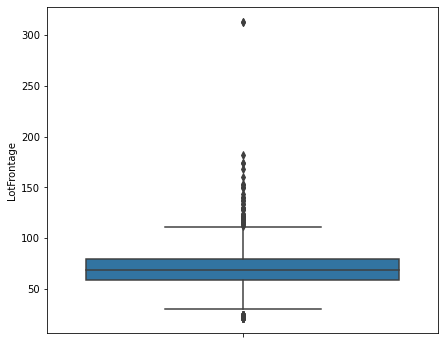

In [85]:
#Now we have all the columns with non null values except LotFrontage, let's see what we can do with this column
#Analyze the LotFrontage column
plt.figure(figsize=(7,6))
sns.boxplot(y=df.LotFrontage)
plt.show()

#As we can see that there are some outliers in this variable, so let's replace the missing values in this field with the median
#value

In [86]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)

In [87]:
df['LotFrontage'].isnull().sum()
#So, now we dont have any missing values in the data

0

# Data Quality and other data checks

Data type check and convert the features into correct data type

In [88]:
#df.info()
#Categorical Data types
categorical_features = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                        'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                        'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','BsmtFullBath',
                        'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                        'TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageFinish','GarageCars',
                        'PavedDrive','MiscFeature','SaleType','SaleCondition']

#Set the datatype of these columns as categorical
df[categorical_features] = df[categorical_features].astype('category')
#Create a list for numerical features using list comprehension
numerical_features = [x for x in df.columns if x not in categorical_features]
numerical_features

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'KitchenQual',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [89]:
#Some of the categorical variables are actually oedered categorical variables, so let's try to use them as numerical variables instead 
#of simply applying them as unordered categorical variables. 
# OverallQual [1-10]
# OverallCond [1-10]
# ExterQual [1-5]
# ExterCond [1-5]
# BsmtQual [1-6]
# BsmtCond [1-6]
# BsmtExposure [1-5]
# BsmtFinType1 [1-7]
# BsmtFinType2 [1-7]
# HeatingQC [1-5]
# KitchenQual [1-5]
# FireplaceQu [1-6]
# GarageQual [1-6]
# GarageCond [1-6]
# PoolQC [1-5]
# Fence [1-5]
#bike.season = bike.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
df.ExterQual = df.ExterQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df.ExterCond = df.ExterCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df.BsmtQual = df.BsmtQual.map({'NoBsmt':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6})
df.BsmtCond = df.BsmtCond.map({'NoBsmt':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6})
df.BsmtExposure = df.BsmtExposure.map({'NoBsmt':1,'No':2,'Mn':3,'Av':4,'Gd':5})
df.BsmtFinType1 = df.BsmtFinType1.map({'NoBsmt':1,'Unf':2,'LwQ':3,'Rec':4,'BLQ':5,'ALQ':6,'GLQ':7})
df.BsmtFinType2 = df.BsmtFinType2.map({'NoBsmt':1,'Unf':2,'LwQ':3,'Rec':4,'BLQ':5,'ALQ':6,'GLQ':7})
df.HeatingQC = df.HeatingQC.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df.KitchenQual = df.KitchenQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df.FireplaceQu = df.FireplaceQu.map({'NoFirePlace':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6})
df.GarageQual = df.GarageQual.map({'NoGarage':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6})
df.GarageCond = df.GarageCond.map({'NoGarage':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6})
df.PoolQC = df.PoolQC.map({'NoPool':1,'Fa':1,'TA':3,'Gd':4,'Ex':5})
df.Fence = df.Fence.map({'NoFence':1,'MnWw':2,'GdWo':3,'MnPrv':4,'GdPrv':5})

In [90]:
#Convert these columns to integers
int_col = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence']
df[int_col].astype('int32')

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,Fence
0,4,3,5,4,2,7,2,5,4,1,4,4,1,1
1,3,3,5,4,5,6,2,5,3,4,4,4,1,1
2,4,3,5,4,3,7,2,5,4,4,4,4,1,1
3,3,3,4,5,2,6,2,4,4,5,4,4,1,1
4,4,3,5,4,4,7,2,5,4,4,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,5,4,2,2,2,5,3,4,4,4,1,1
1456,3,3,5,4,2,6,4,3,3,4,4,4,1,4
1457,5,4,4,5,2,7,2,5,4,5,4,4,1,5
1458,3,3,4,4,3,7,4,4,4,1,4,4,1,1


In [92]:
#Check duplicates
df.duplicated().sum()
#There are no suplicates in the dataset

0

In [93]:
#Drop the id column, as it is of no use for prediction
df.drop('Id',axis = 1,inplace = True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1451 non-null   category
 1   MSZoning       1451 non-null   category
 2   LotFrontage    1451 non-null   float64 
 3   LotArea        1451 non-null   int64   
 4   Street         1451 non-null   category
 5   Alley          1451 non-null   category
 6   LotShape       1451 non-null   category
 7   LandContour    1451 non-null   category
 8   Utilities      1451 non-null   category
 9   LotConfig      1451 non-null   category
 10  LandSlope      1451 non-null   category
 11  Neighborhood   1451 non-null   category
 12  Condition1     1451 non-null   category
 13  Condition2     1451 non-null   category
 14  BldgType       1451 non-null   category
 15  HouseStyle     1451 non-null   category
 16  OverallQual    1451 non-null   int64   
 17  OverallCond    1451 non-null   in

Mode percentage for each categorical variable, i.e. how many categorical variables have same value for most of the rows

In [95]:
mode_perc = []

for i in categorical_features:
    mode_perc.append(round(df[i].value_counts()[0]/len(df[i])*100,2))

mode = pd.DataFrame({'col_name': categorical_features,'mode_perc':mode_perc})
mode.sort_values(by='mode_perc',ascending = False)

,col_name,mode_perc
6,Utilities,99.93
2,Street,99.59
11,Condition2,98.97
15,RoofMatl,98.21
20,Heating,97.79
36,MiscFeature,96.28
28,KitchenAbvGr,95.38
8,LandSlope,94.62
24,BsmtHalfBath,94.35
3,Alley,93.80


Let's drop the ones which has more than 80% same value i.e. mode 

In [96]:
drop_cols = mode[mode['mode_perc']>80]
drop_list = list(drop_cols['col_name'])
df.drop(drop_list,axis = 1,inplace = True)

In [97]:
df.shape

(1451, 61)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1451 non-null   category
 1   MSZoning       1451 non-null   category
 2   LotFrontage    1451 non-null   float64 
 3   LotArea        1451 non-null   int64   
 4   LotShape       1451 non-null   category
 5   LotConfig      1451 non-null   category
 6   Neighborhood   1451 non-null   category
 7   HouseStyle     1451 non-null   category
 8   OverallQual    1451 non-null   int64   
 9   OverallCond    1451 non-null   int64   
 10  YearBuilt      1451 non-null   int64   
 11  YearRemodAdd   1451 non-null   int64   
 12  RoofStyle      1451 non-null   category
 13  Exterior1st    1451 non-null   category
 14  Exterior2nd    1451 non-null   category
 15  MasVnrType     1451 non-null   category
 16  MasVnrArea     1451 non-null   float64 
 17  ExterQual      1451 non-null   in

In [99]:
#Function to recalcuate the list of categorical and numerical features everytime we drop or add a variable

def recalculate_feature_list(df):

    numerical_features =  [x for x in df.columns if (df[x].dtype == 'int64' or df[x].dtype == 'float64' or df[x].dtype == 'object')]
    categorical_features =  [x for x in df.columns if (df[x].dtype != 'int64' and df[x].dtype != 'float64' and df[x].dtype != 'object')]
    return(categorical_features,numerical_features)

In [100]:
categorical_features, numerical_features = recalculate_feature_list(df)

# EDA Univariate and Bivariate Analysis

MSSubClass Analysis:
******************************************
MSSubClass Histogram:


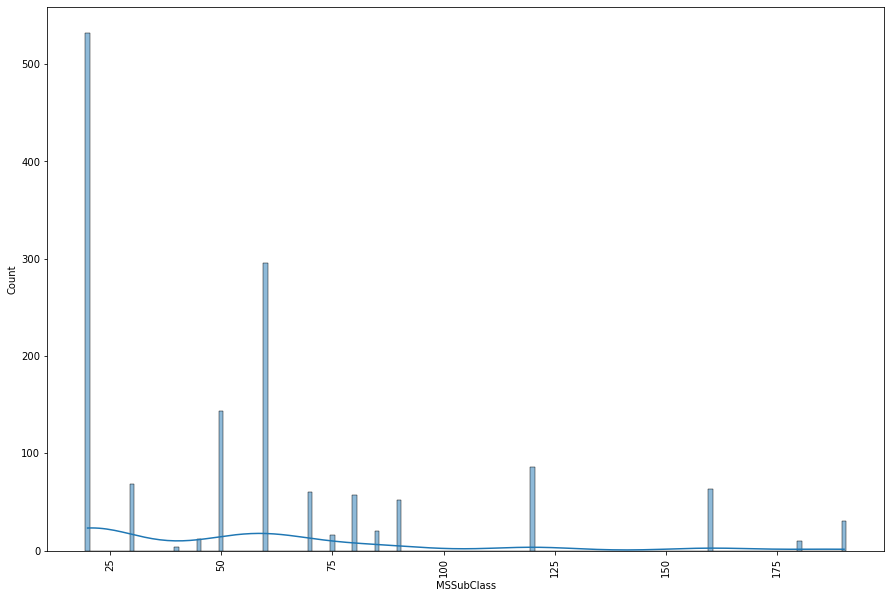

************************************************************************************
MSZoning Analysis:
******************************************
MSZoning Histogram:


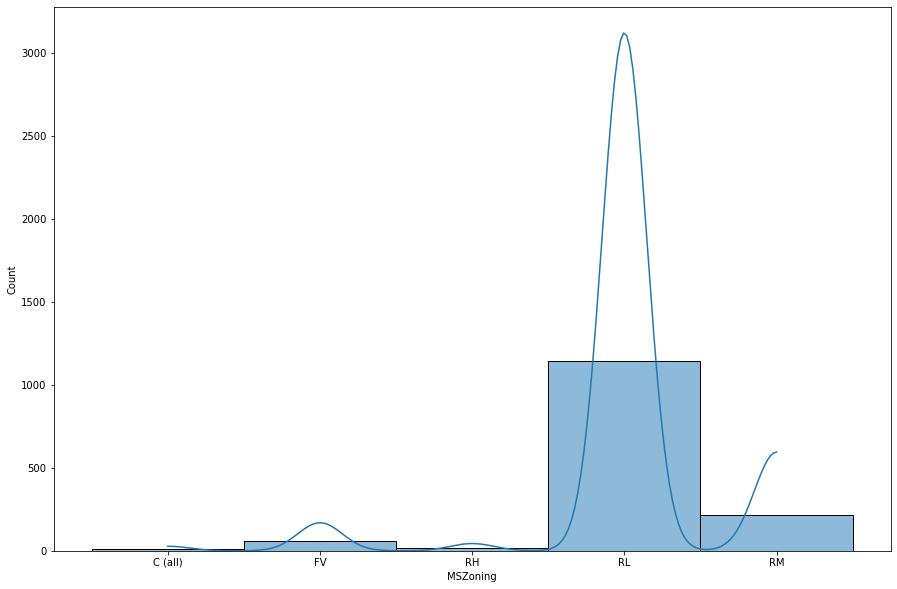

************************************************************************************
LotShape Analysis:
******************************************
LotShape Histogram:


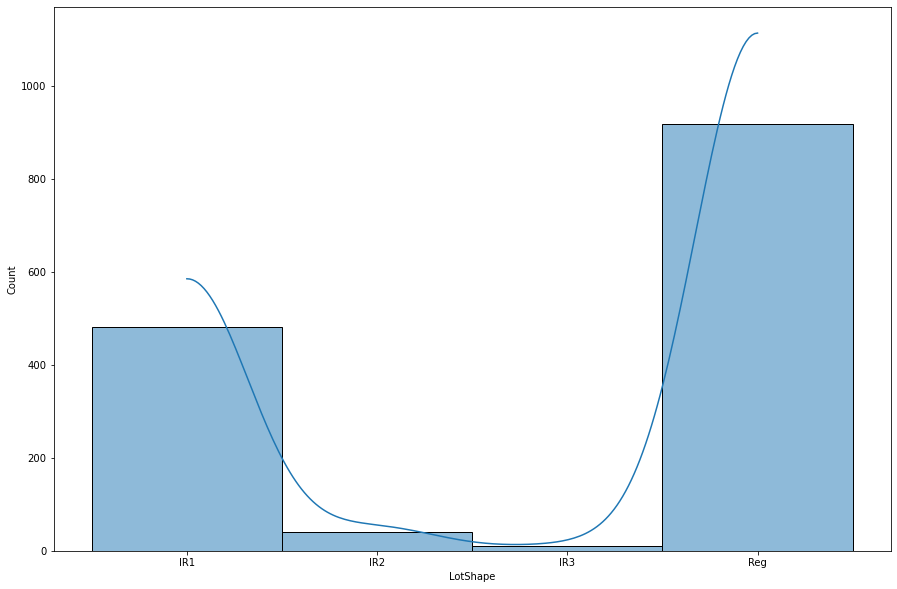

************************************************************************************
LotConfig Analysis:
******************************************
LotConfig Histogram:


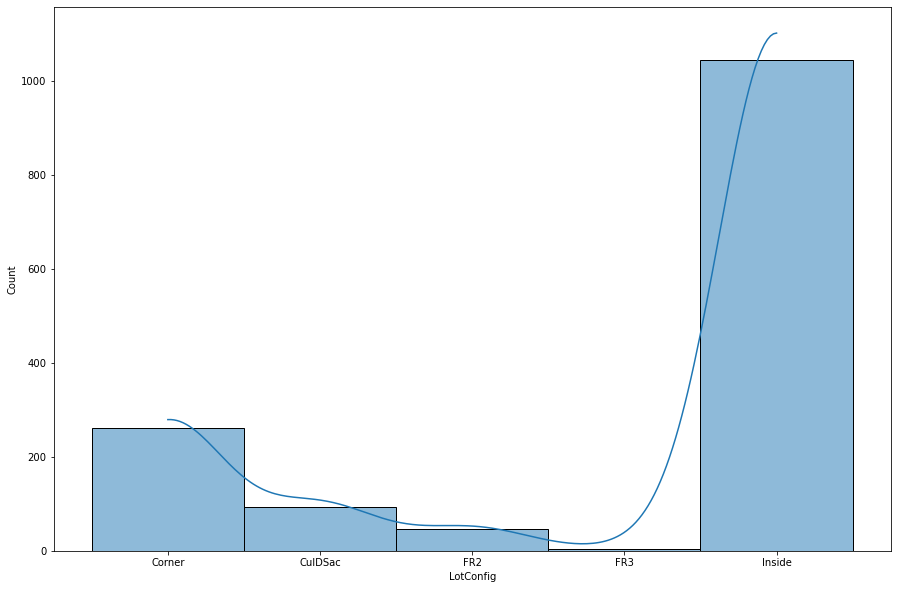

************************************************************************************
Neighborhood Analysis:
******************************************
Neighborhood Histogram:


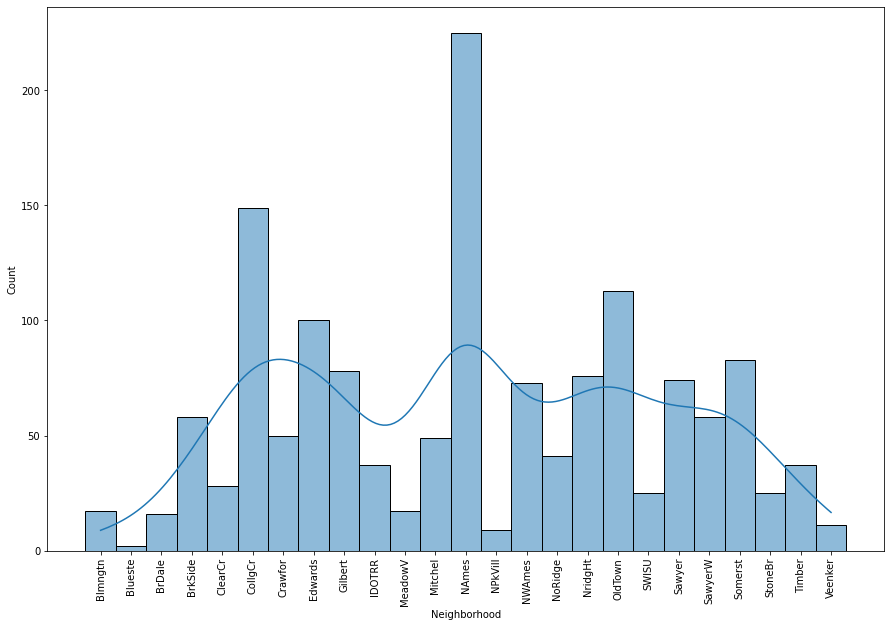

************************************************************************************
HouseStyle Analysis:
******************************************
HouseStyle Histogram:


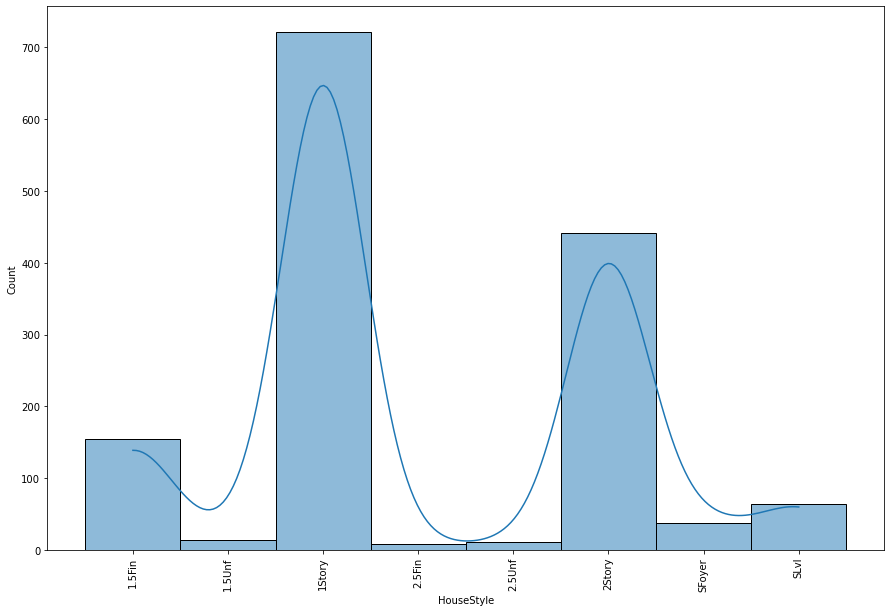

************************************************************************************
RoofStyle Analysis:
******************************************
RoofStyle Histogram:


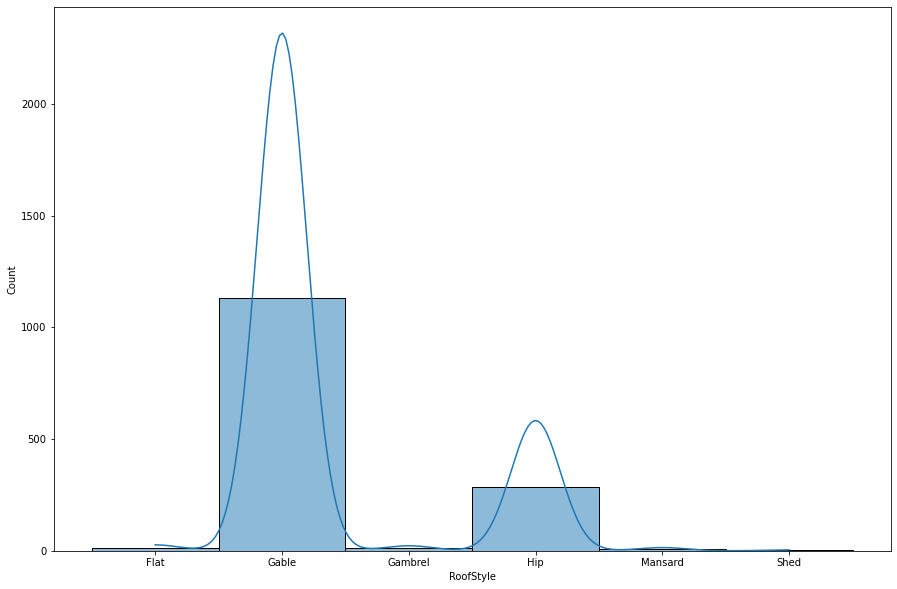

************************************************************************************
Exterior1st Analysis:
******************************************
Exterior1st Histogram:


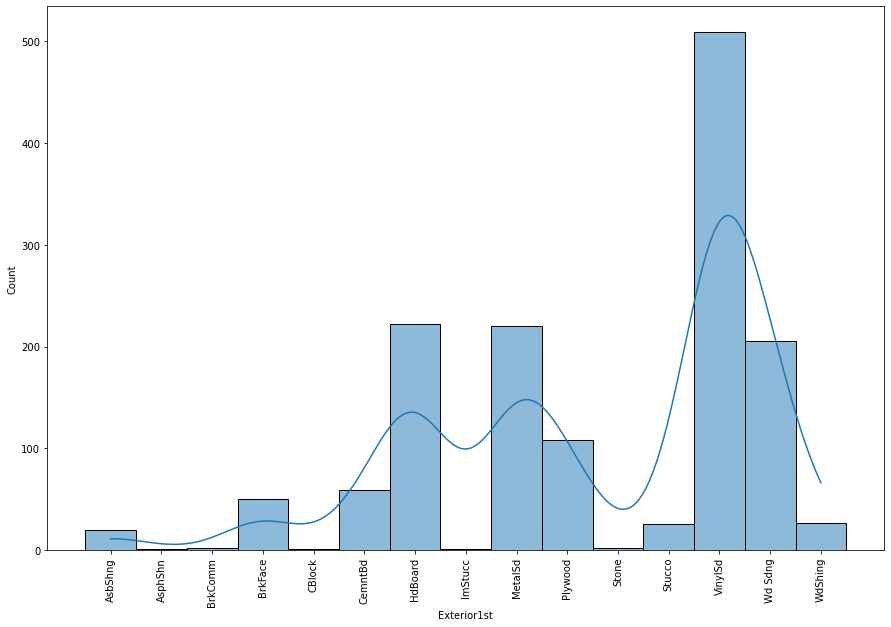

************************************************************************************
Exterior2nd Analysis:
******************************************
Exterior2nd Histogram:


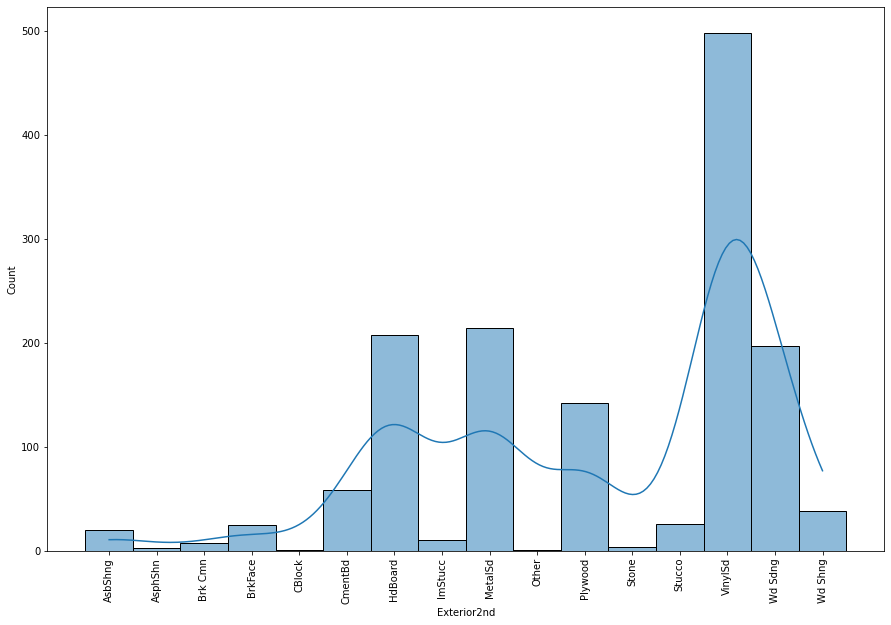

************************************************************************************
MasVnrType Analysis:
******************************************
MasVnrType Histogram:


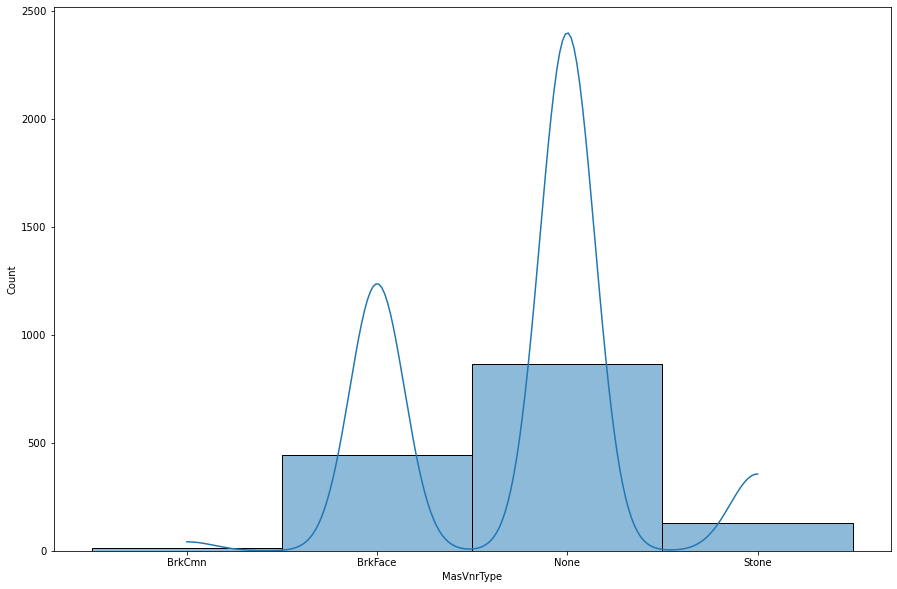

************************************************************************************
Foundation Analysis:
******************************************
Foundation Histogram:


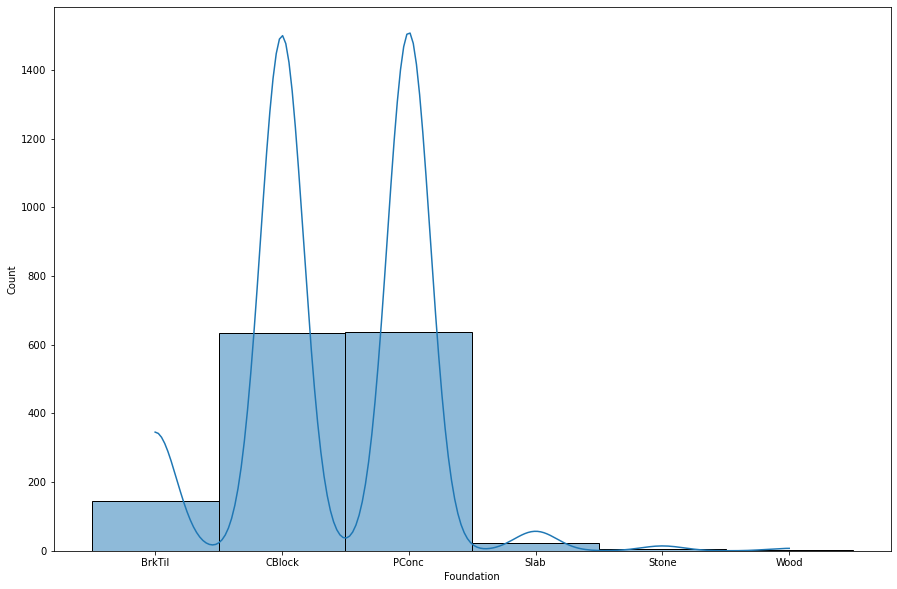

************************************************************************************
BsmtFullBath Analysis:
******************************************
BsmtFullBath Histogram:


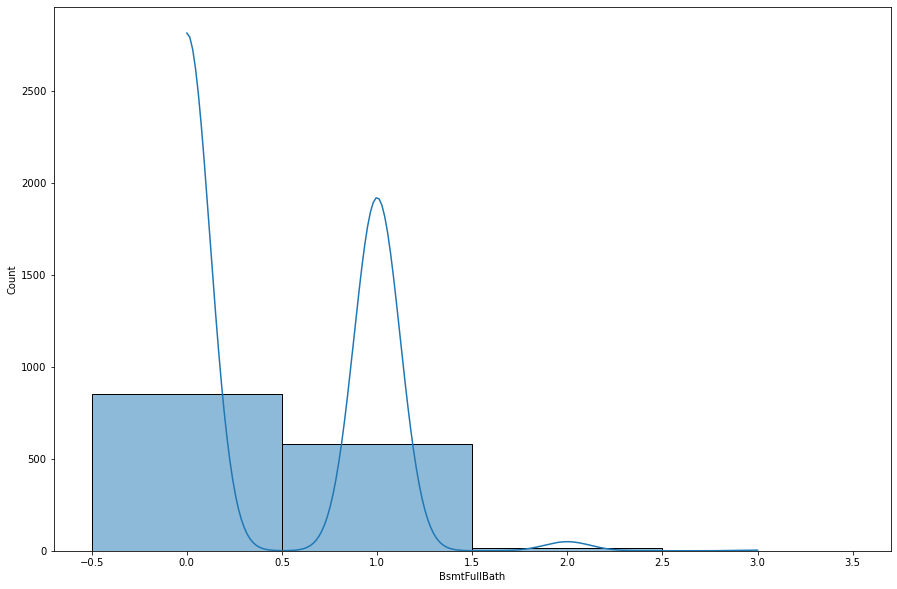

************************************************************************************
FullBath Analysis:
******************************************
FullBath Histogram:


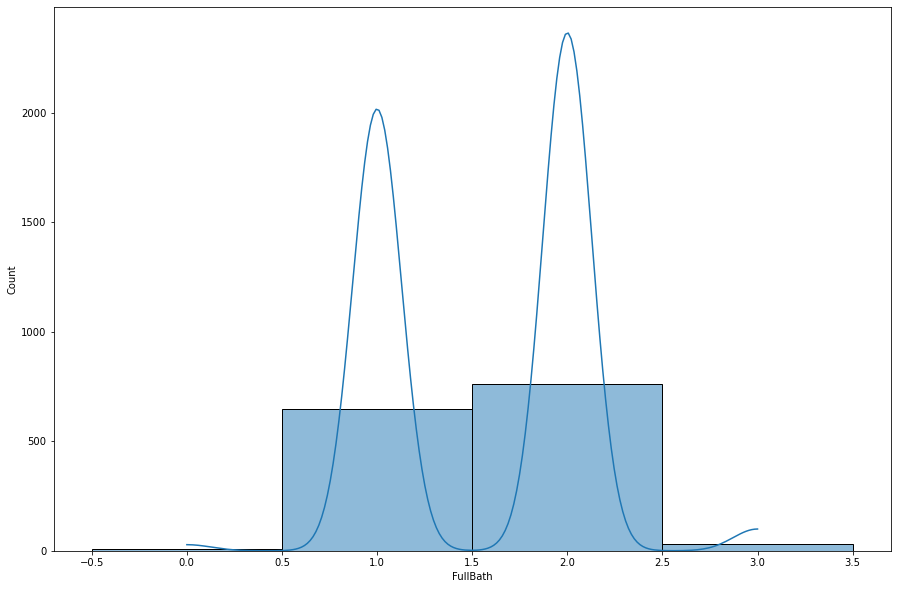

************************************************************************************
HalfBath Analysis:
******************************************
HalfBath Histogram:


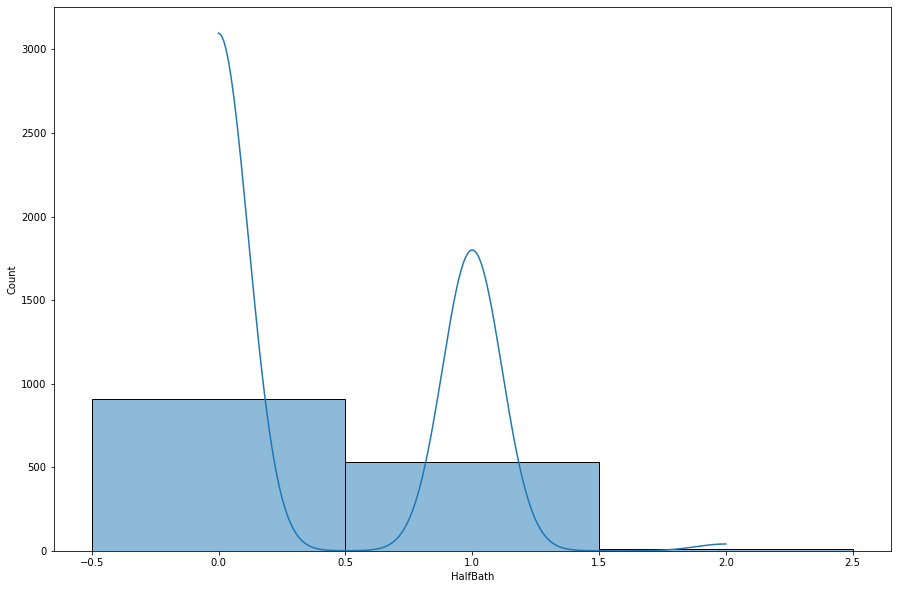

************************************************************************************
BedroomAbvGr Analysis:
******************************************
BedroomAbvGr Histogram:


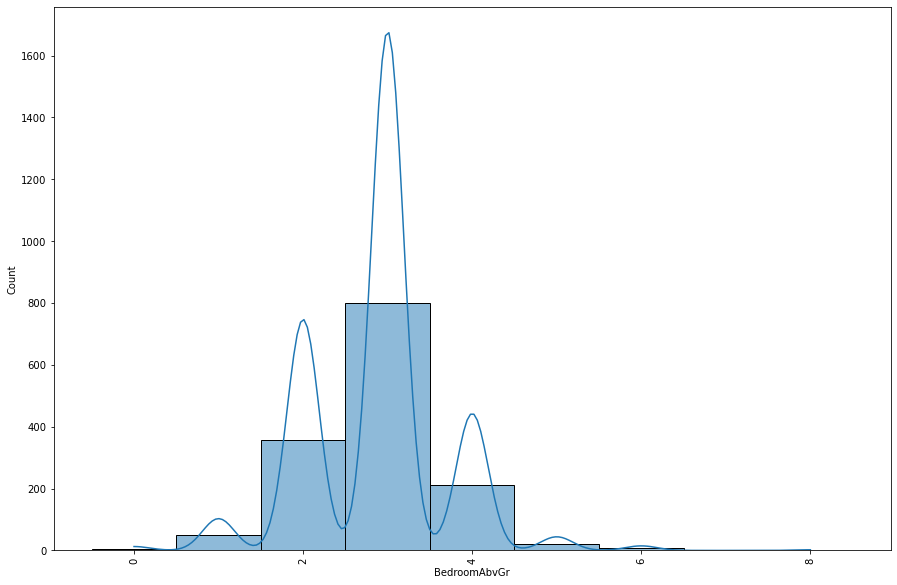

************************************************************************************
TotRmsAbvGrd Analysis:
******************************************
TotRmsAbvGrd Histogram:


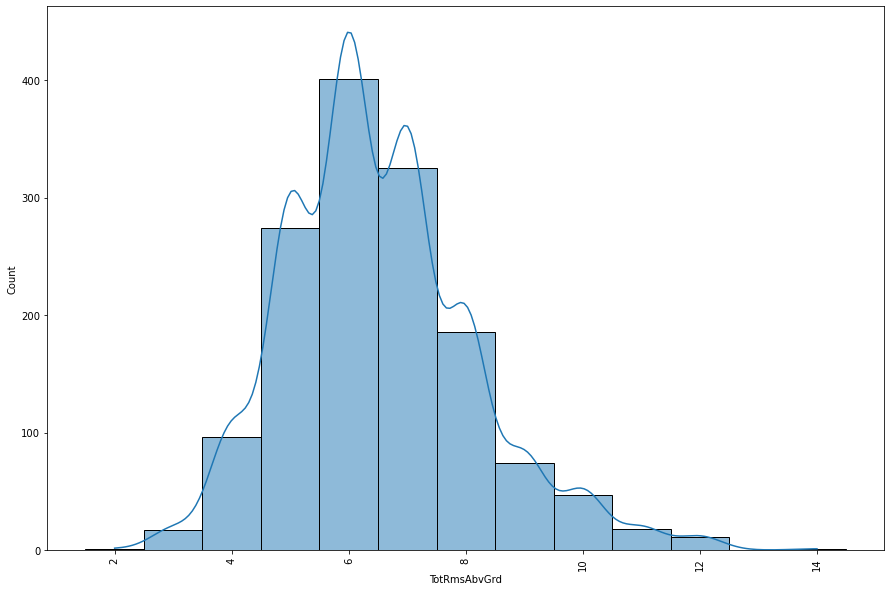

************************************************************************************
Fireplaces Analysis:
******************************************
Fireplaces Histogram:


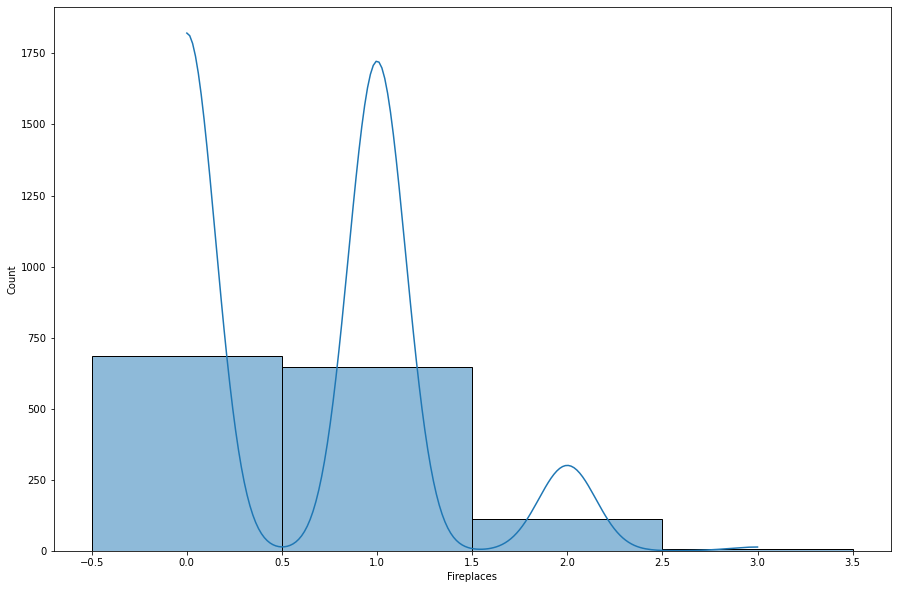

************************************************************************************
GarageType Analysis:
******************************************
GarageType Histogram:


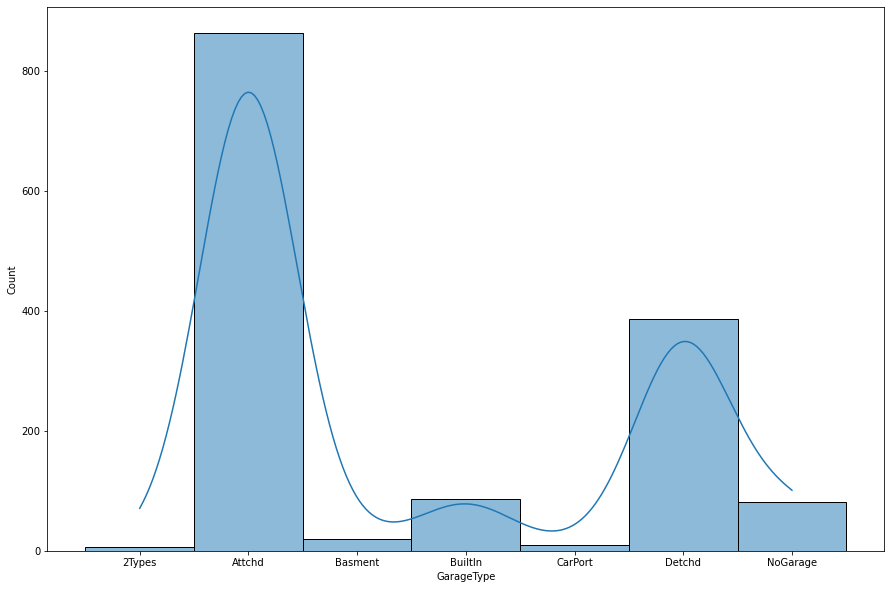

************************************************************************************
GarageFinish Analysis:
******************************************
GarageFinish Histogram:


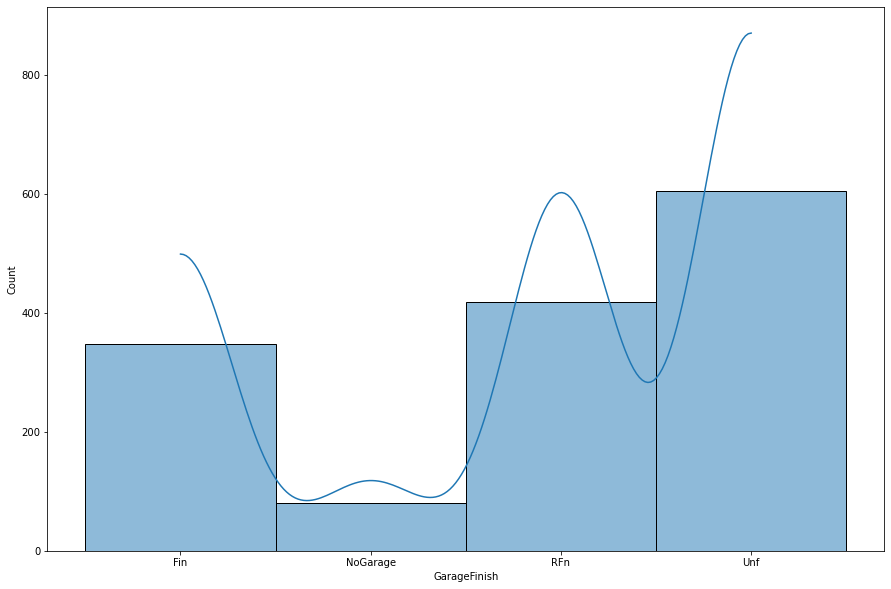

************************************************************************************
GarageCars Analysis:
******************************************
GarageCars Histogram:


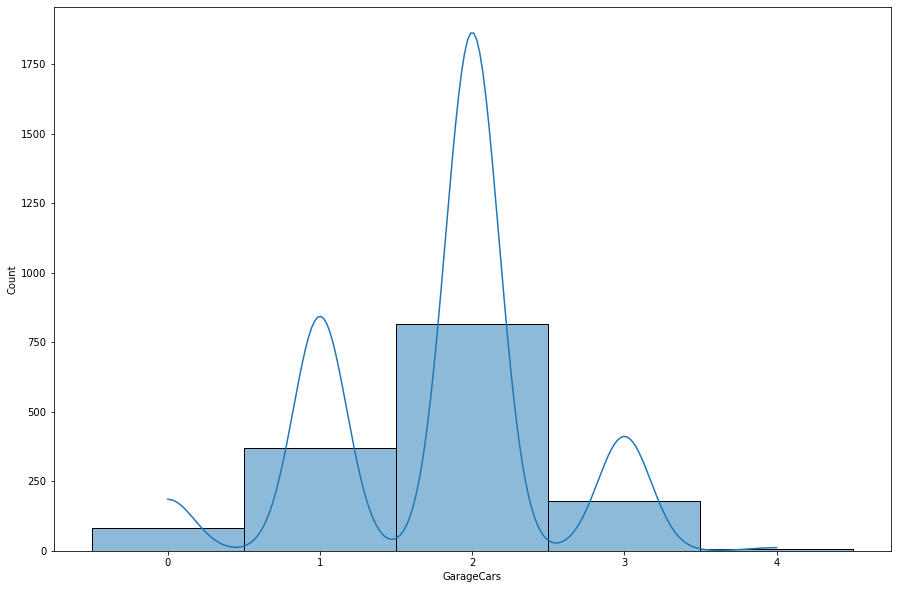

************************************************************************************


In [101]:
# Univariate Analysis of all the categorical variables using histogram and count_values function
# and also plot their relationship with the sale price
for i in categorical_features:
    print(i + ' Analysis:')
    print('******************************************')
    print(i+ ' Histogram:')
    plt.figure(figsize=(15,10))
    sns.histplot(df[i],kde=True)
    if len(df[i].unique())>7:
        plt.xticks(rotation=90)
    plt.show()
    print('************************************************************************************')

OverallCond and OverallQual are two ordered categorical variables. Ordinal variables are fundamentally categorical. One simple option is to ignore the order in the variable’s categories and treat it as nominal, as these features are not central to the overall question & doesn't violate any assumptions of the linear regression. 

Other categorical variables are regular in nature, nothing specific to mention. 

# Bivariate Analysis of the categorical variables with the sale price

Plot the sale price against the categorical variables in one chart

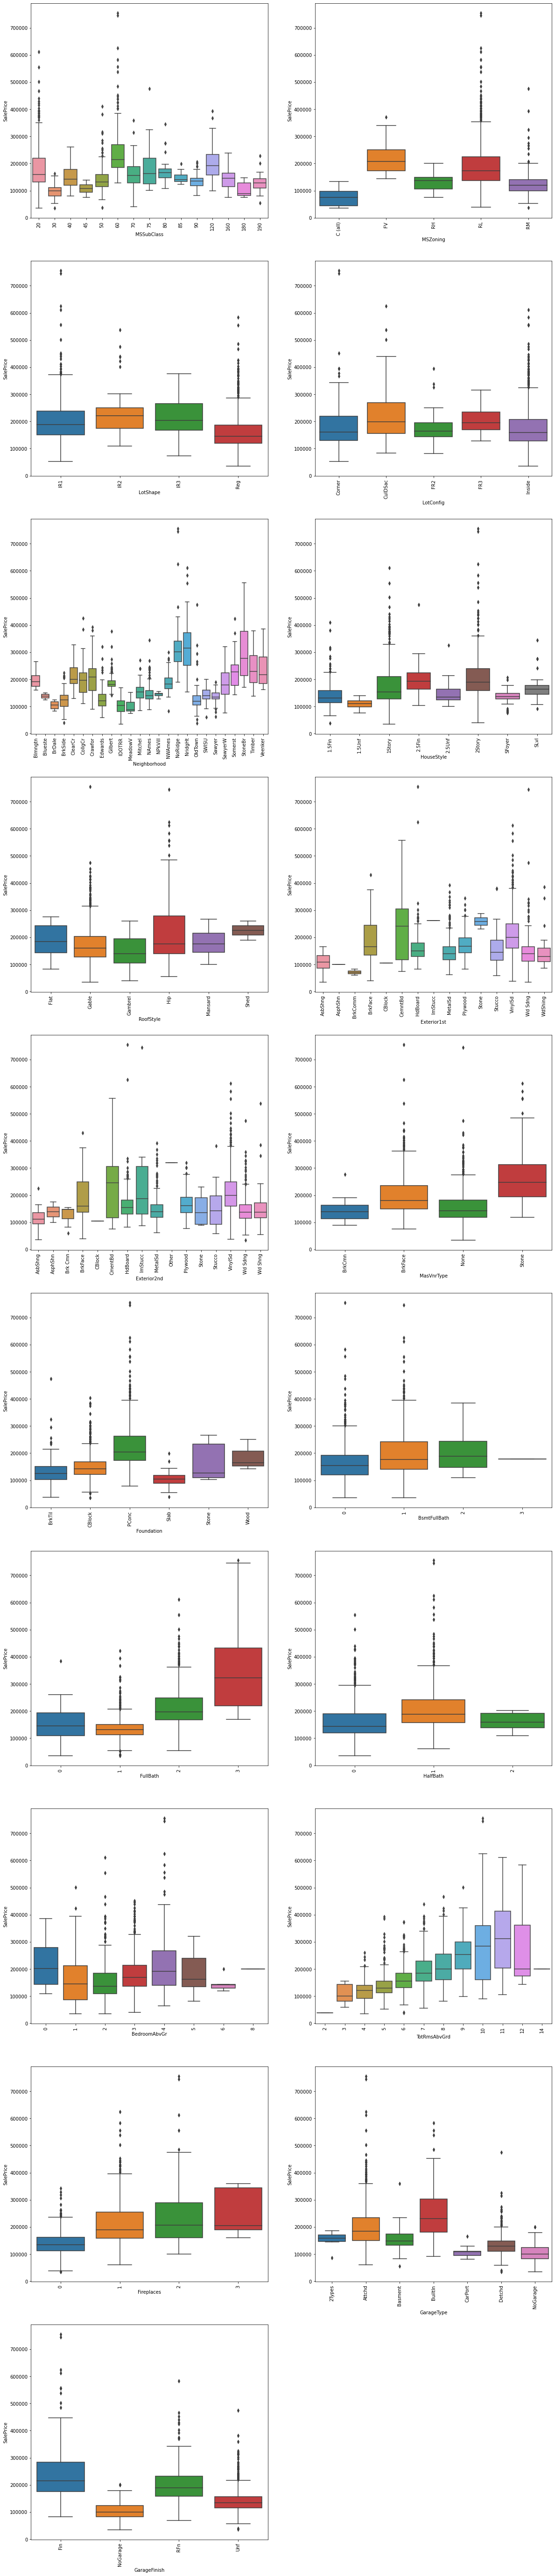

In [102]:
plt.figure(figsize=(20,100))

for i in range(1,len(categorical_features)):
    plt.subplot(len(categorical_features)//2,2,i)
    sns.boxplot(data = df, x = df[categorical_features[i-1]], y = df['SalePrice'])
    plt.xticks(rotation=90)
#fig.tight_layout()
plt.show()

Observation: With almost all the categorical variables, we could see that the target variable i.e. the house prices are changing, hence we can't drop any more categorical variable based on the visualization of the box plots above.

# Process Numerical variables and outlier treatment

In [103]:
from datetime import date
todays_date = date.today()
#Age of the building
df['PropertyAge'] = todays_date.year - df['YearBuilt']
df['YearsSinceRemodel'] = todays_date.year - df['YearRemodAdd']
df['GarageAge'] = todays_date.year - df['GarageYrBlt']
df['YearsSinceSold'] = todays_date.year - df['YrSold']

In [104]:
#Delete YearBuilt, YearRemodAdd, GarageYrBlt,YrSold and MoSold
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis = 1, inplace = True)

In [105]:
categorical_features, numerical_features = recalculate_feature_list(df)

In [106]:
#Fix GarageAge
df['GarageAge'] = df['GarageAge'].apply(lambda x: x if x!=2022 else 0)

In [107]:
df[numerical_features].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,KitchenQual,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,PropertyAge,YearsSinceRemodel,GarageAge,YearsSinceSold
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,69.845624,10507.808408,6.093728,5.579600,103.75672,3.392143,3.08408,4.485872,3.933839,2.631978,4.543074,442.274983,2.248794,46.838043,567.197105,1056.310131,4.141971,1161.551344,346.742247,5.880772,1514.174363,3.508615,2.827016,472.525155,3.809097,3.807719,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,1.011716,1.569263,43.758787,180624.101999,50.907650,37.239835,41.210200,14.184700
std,22.044429,9992.987081,1.381467,1.113415,181.10815,0.572876,0.35208,0.877481,0.553141,1.067862,2.106158,455.369276,0.894884,161.777324,442.209192,437.914609,0.960156,385.002532,436.453277,48.771560,525.799521,0.663659,1.810997,214.171752,0.724983,0.721757,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,0.201376,1.207388,497.648467,79312.128273,30.190266,20.651334,25.996643,1.329376
min,21.000000,1300.000000,1.000000,1.000000,0.00000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,12.000000,12.000000,0.000000,12.000000
25%,60.000000,7537.500000,5.000000,5.000000,0.00000,3.000000,3.00000,4.000000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,222.000000,795.000000,3.000000,882.000000,0.000000,0.000000,1128.000000,3.000000,1.000000,327.500000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,129900.000000,22.000000,18.000000,19.000000,13.000000
50%,69.000000,9477.000000,6.000000,5.000000,0.00000,3.000000,3.00000,5.000000,4.000000,2.000000,5.000000,381.000000,2.000000,0.000000,479.000000,991.000000,5.000000,1086.000000,0.000000,0.000000,1464.000000,3.000000,3.000000,478.000000,4.000000,4.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,162500.000000,50.000000,29.000000,38.000000,14.000000
75%,79.000000,11600.000000,7.000000,6.000000,166.00000,4.000000,3.00000,5.000000,4.000000,3.000000,7.000000,707.000000,2.000000,0.000000,808.000000,1297.500000,5.000000,1391.000000,728.000000,0.000000,1776.000000,4.000000,5.000000,576.000000,4.000000,4.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,214000.000000,68.000000,56.000000,60.000000,15.000000
max,313.000000,215245.000000,10.000000,9.000000,1600.00000,5.000000,5.00000,6.000000,5.000000,5.000000,7.000000,5644.000000,7.000000,1474.000000,2336.000000,6110.000000,5.000000,4692.000000,2065.000000,572.000000,5642.000000,5.000000,6.000000,1418.000000,6.000000,6.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,5.000000,5.000000,15500.000000,755000.000000,150.000000,72.000000,122.000000,16.000000


LotFrontage


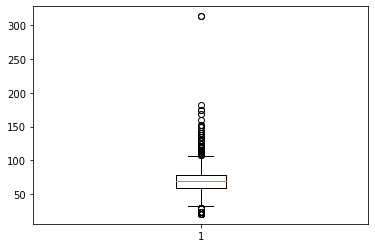

LotArea


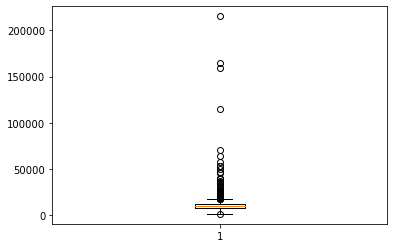

OverallQual


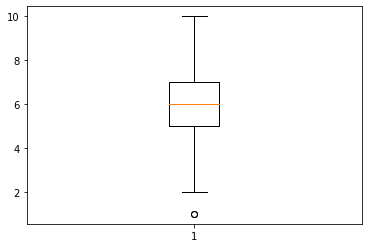

OverallCond


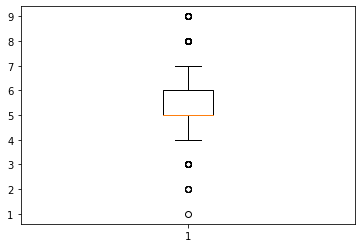

MasVnrArea


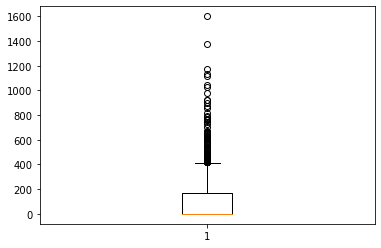

ExterQual


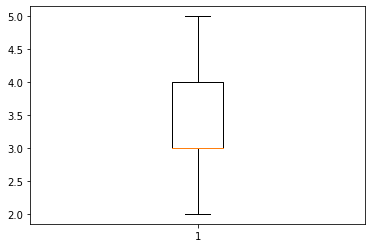

ExterCond


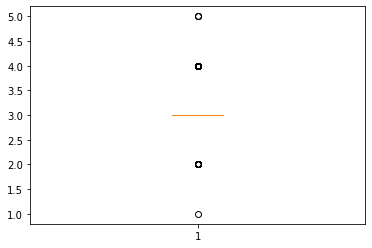

BsmtQual


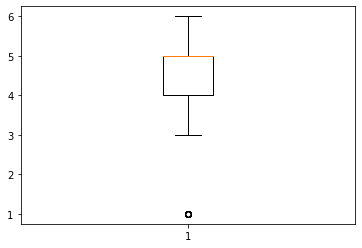

BsmtCond


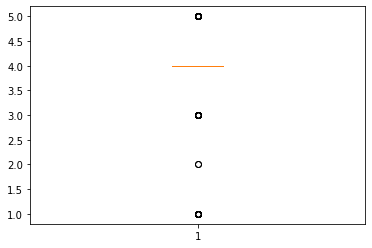

BsmtExposure


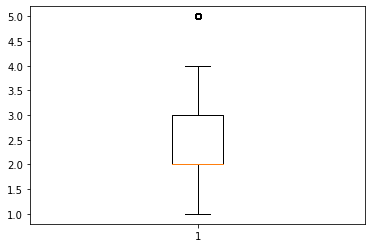

BsmtFinType1


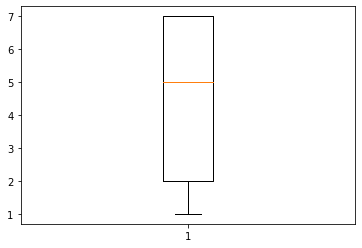

BsmtFinSF1


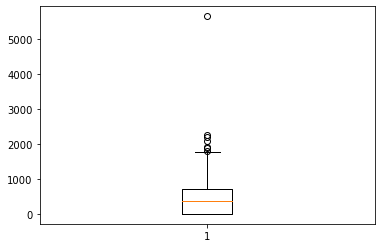

BsmtFinType2


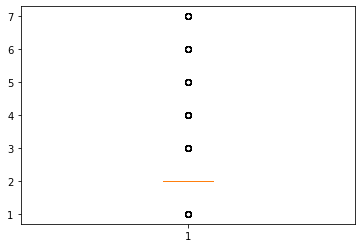

BsmtFinSF2


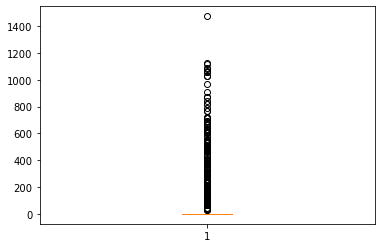

BsmtUnfSF


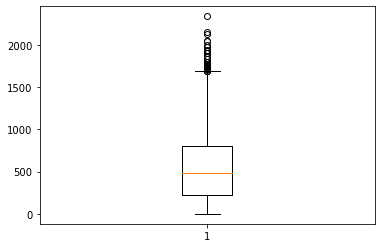

TotalBsmtSF


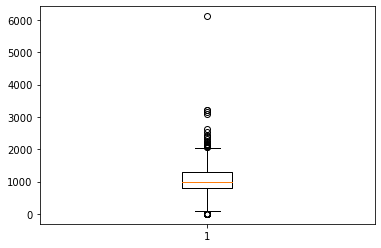

HeatingQC


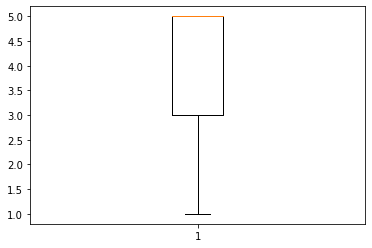

1stFlrSF


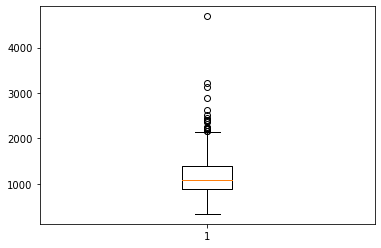

2ndFlrSF


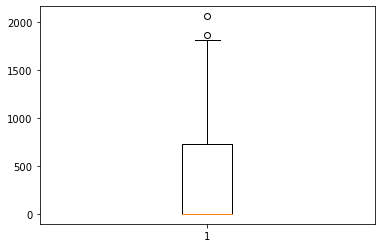

LowQualFinSF


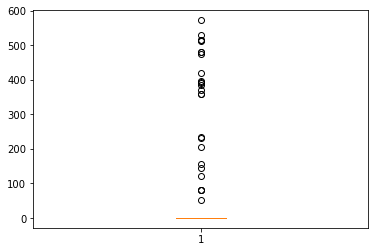

GrLivArea


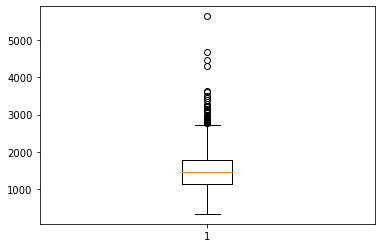

KitchenQual


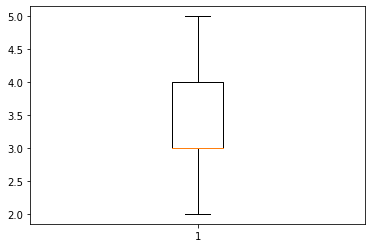

FireplaceQu


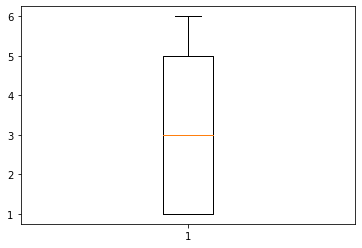

GarageArea


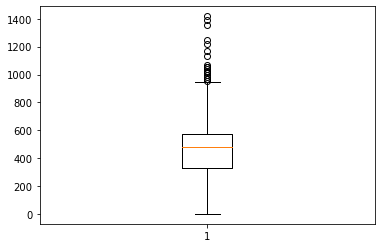

GarageQual


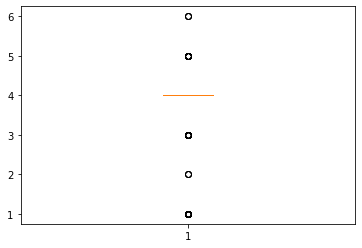

GarageCond


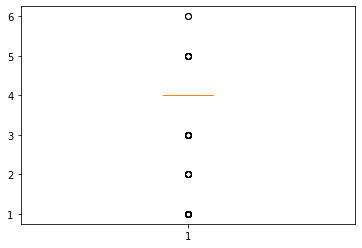

WoodDeckSF


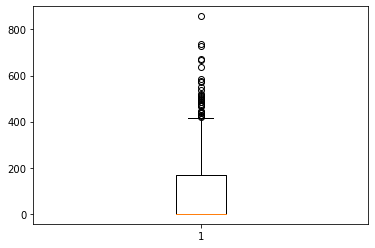

OpenPorchSF


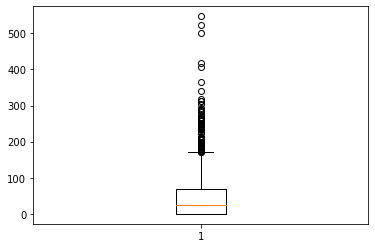

EnclosedPorch


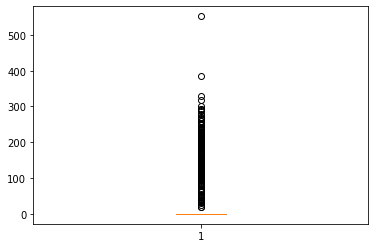

3SsnPorch


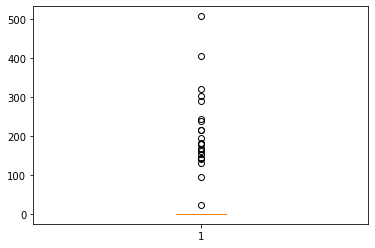

ScreenPorch


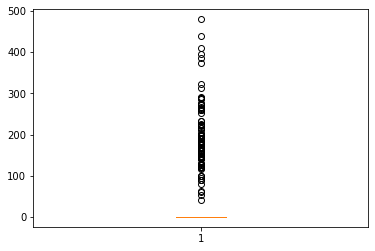

PoolArea


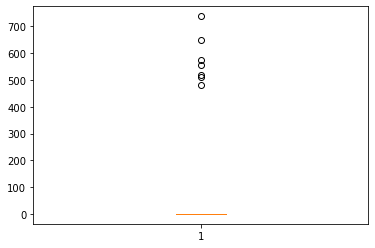

PoolQC


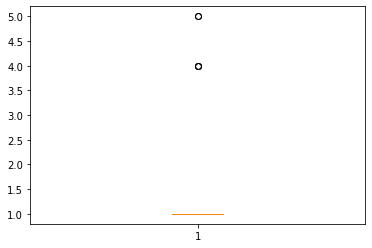

Fence


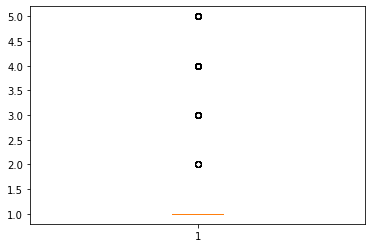

MiscVal


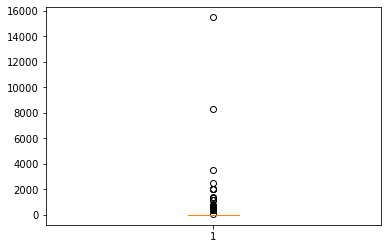

SalePrice


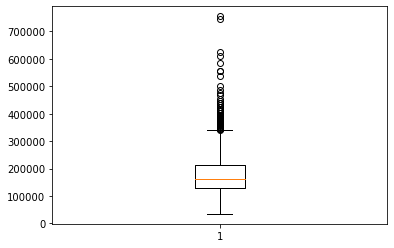

PropertyAge


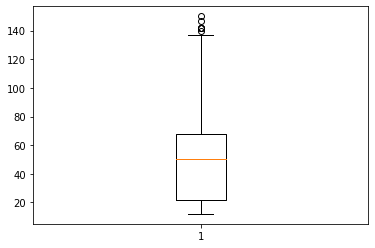

YearsSinceRemodel


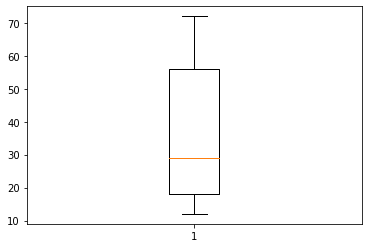

GarageAge


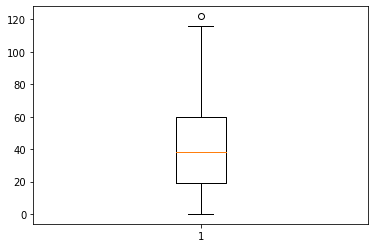

YearsSinceSold


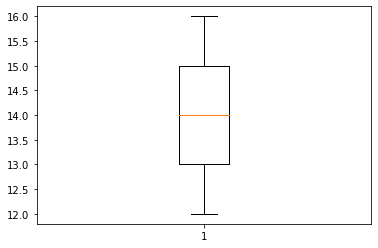

In [108]:
for i in numerical_features:
    print(i)
    plt.boxplot(df[i])
    plt.show()

In [109]:
#Lets remove the outlier data based on the LotArea
#Outlier removal function
def remove_outliers(df,col_name):
    q1 = df[col_name].quantile(.25)
    q3 = df[col_name].quantile(.75)
    iqr = q3-q1

    df = df[(df[col_name] > q1-1.5*iqr) & (df[col_name] < q3+1.5*iqr)]
    return df

df = remove_outliers(df,'LotArea')
df = remove_outliers(df,'MasVnrArea')
#df = remove_outliers(df,'BsmtFinSF2')
#df = remove_outliers(df,'EnclosedPorch')
#df = remove_outliers(df,'ScreenPorch')

In [110]:
df.shape

(1296, 60)

LotFrontage


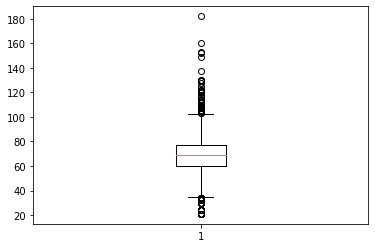

LotArea


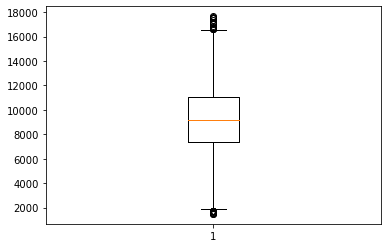

OverallQual


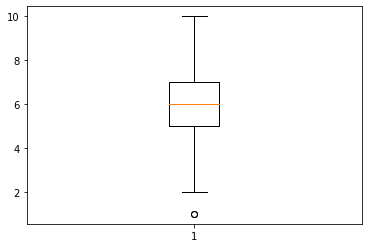

OverallCond


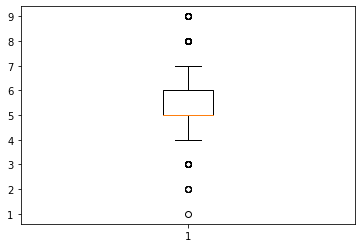

MasVnrArea


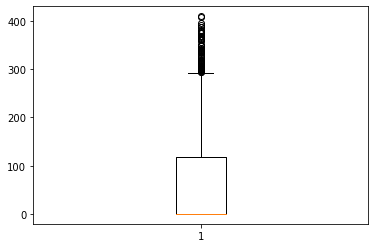

ExterQual


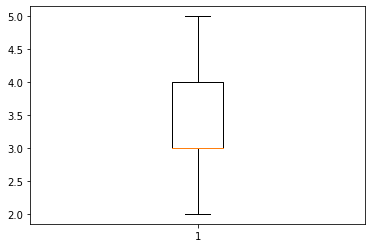

ExterCond


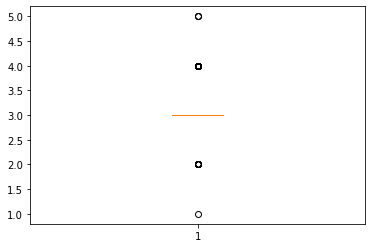

BsmtQual


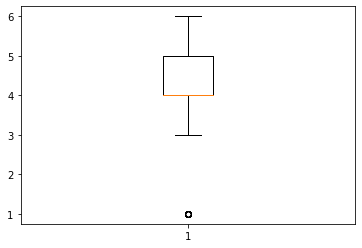

BsmtCond


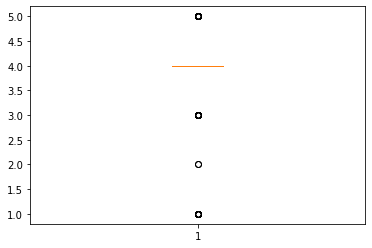

BsmtExposure


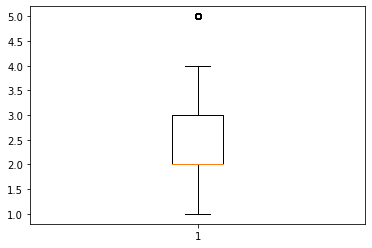

BsmtFinType1


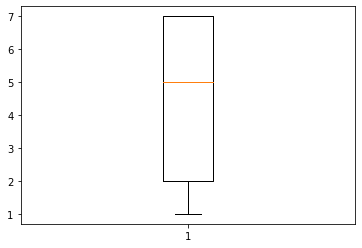

BsmtFinSF1


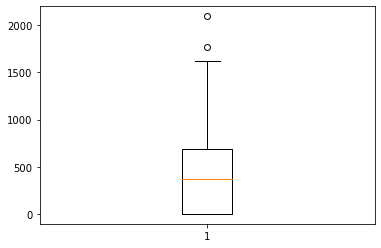

BsmtFinType2


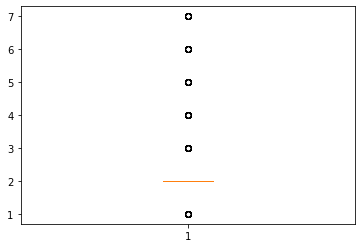

BsmtFinSF2


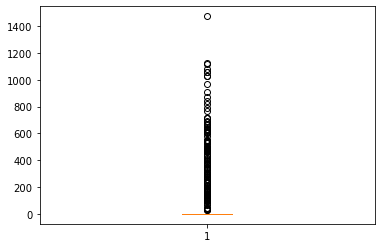

BsmtUnfSF


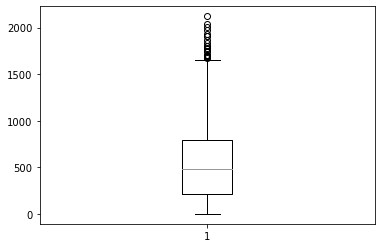

TotalBsmtSF


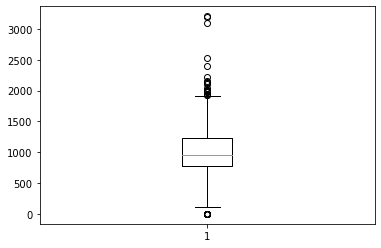

HeatingQC


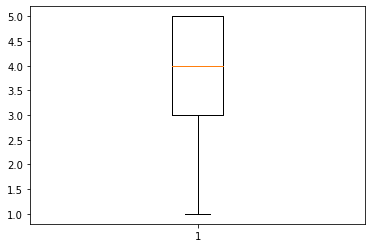

1stFlrSF


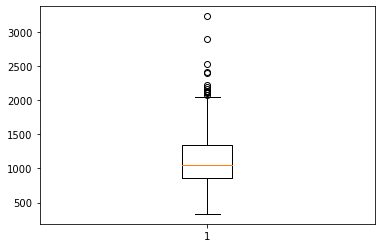

2ndFlrSF


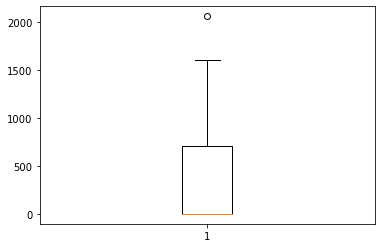

LowQualFinSF


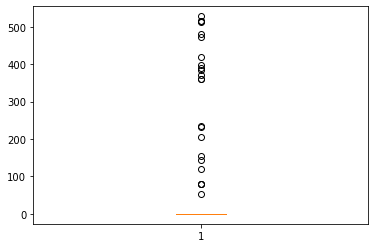

GrLivArea


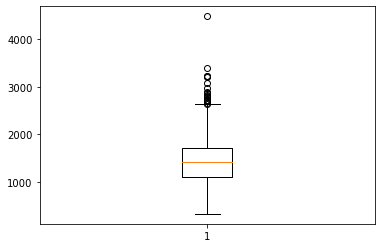

KitchenQual


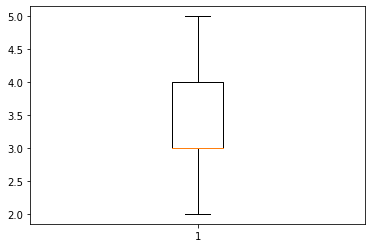

FireplaceQu


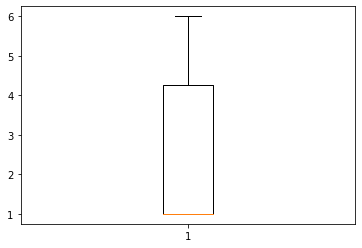

GarageArea


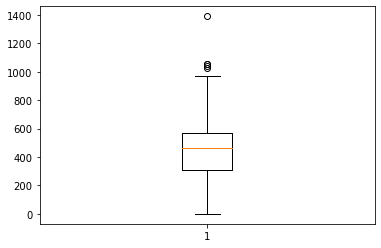

GarageQual


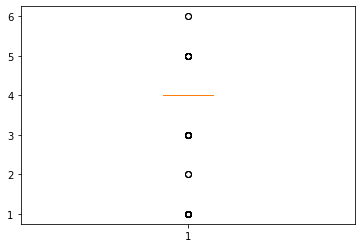

GarageCond


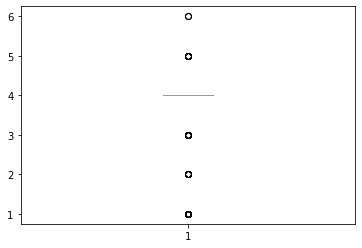

WoodDeckSF


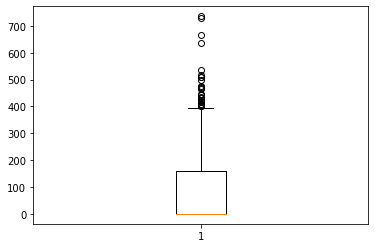

OpenPorchSF


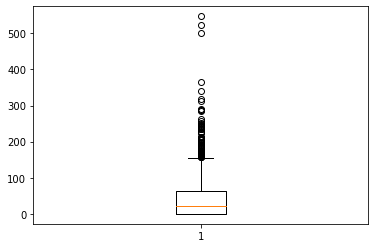

EnclosedPorch


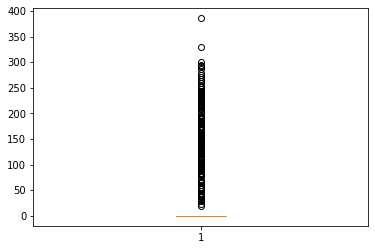

3SsnPorch


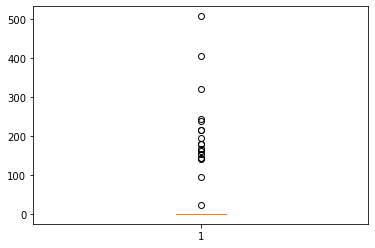

ScreenPorch


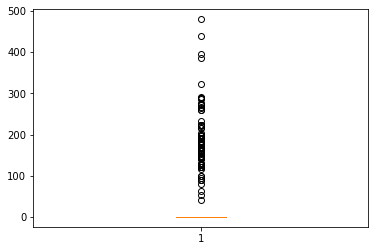

PoolArea


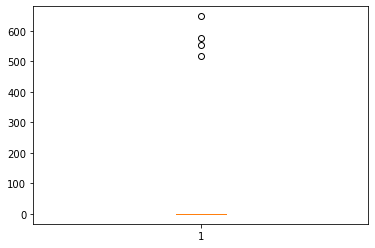

PoolQC


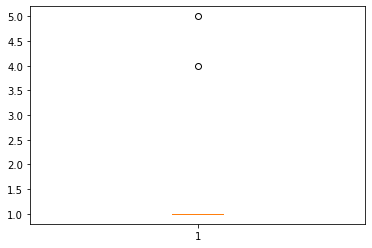

Fence


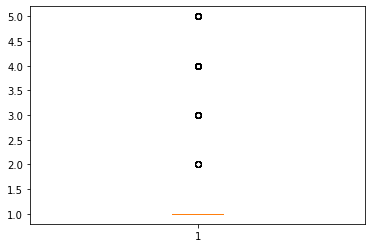

MiscVal


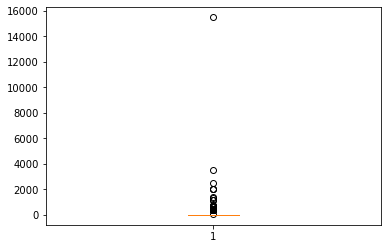

SalePrice


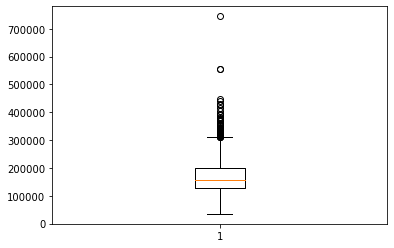

PropertyAge


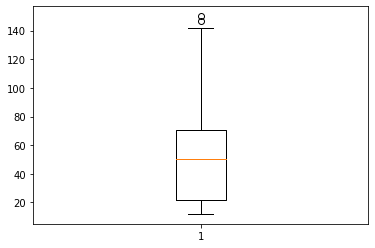

YearsSinceRemodel


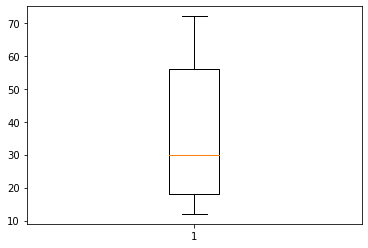

GarageAge


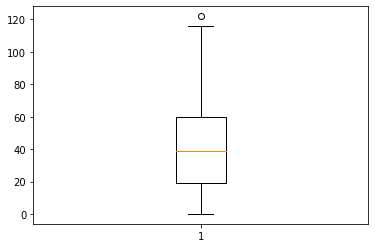

YearsSinceSold


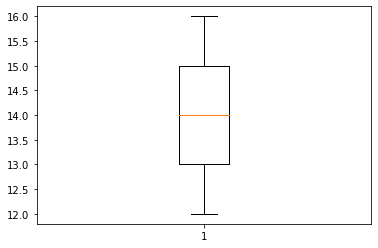

In [111]:
#Lets plot the boxplot after removing the outliers
for i in numerical_features:
    print(i)
    plt.boxplot(df[i])
    plt.show()

We can see that the outlier situation has improved, but since we have limited data let's proceed with the current data.

In [112]:
df.shape
#We have discarded 76 data points out of a total of 1460 data points so far which is around 5% of the total dataset

(1296, 60)

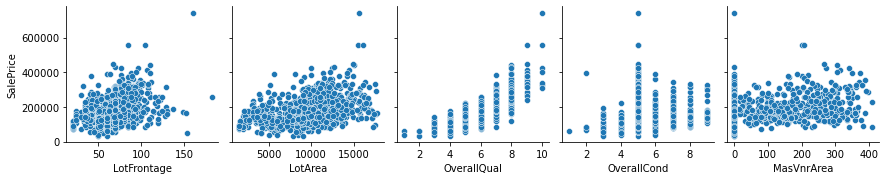

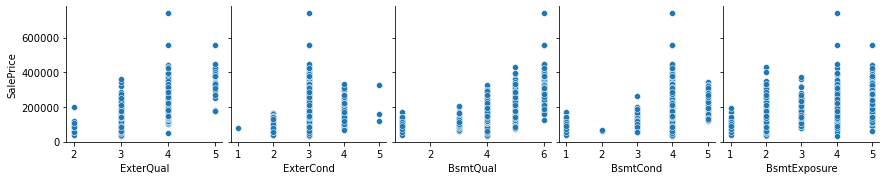

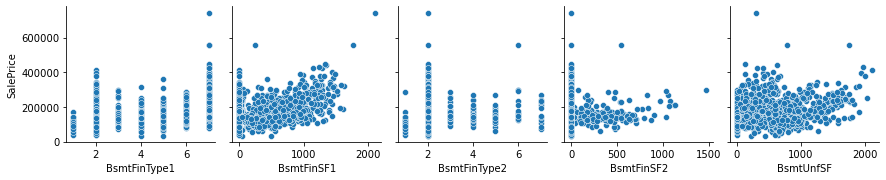

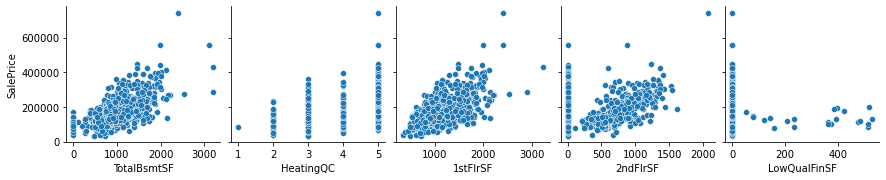

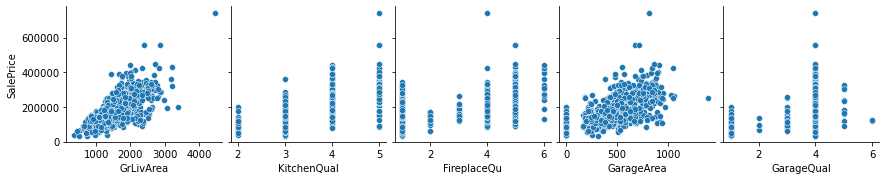

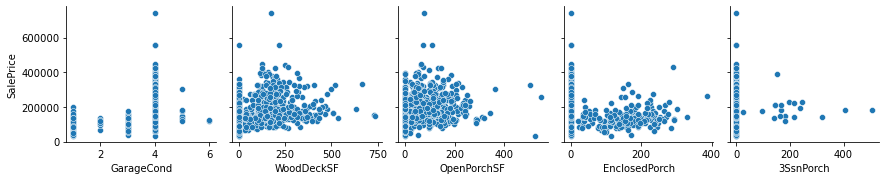

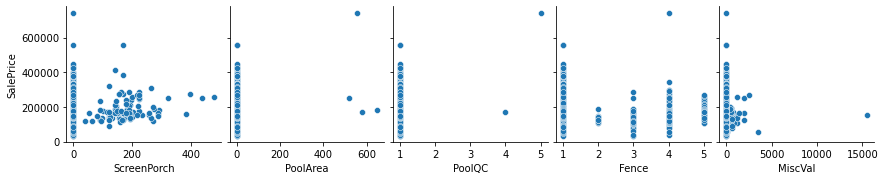

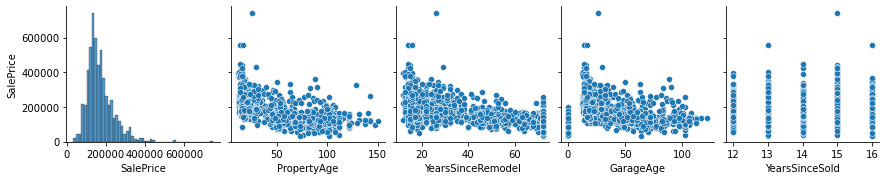

In [117]:
#Visualizing numeric variable pairplot to see how they are correlated

sns.pairplot(data = df, x_vars = numerical_features[0:5], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[5:10], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[10:15], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[15:20], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[20:25], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[25:30], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[30:35], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[35:40], y_vars = ['SalePrice'])
plt.show()

Observation - We could see that there are a number of numerical variables which are linearly correlated with the target variable i.e. SalePrice. Some are positively correlated and some even negatively correlated, this satisfies one of the requirement to use linear reqgression that Target variable should be linearly related with the predictor variables. 

In [118]:
#Drop PoolArea,MiscVal,3SsnPorch,LowQualFinSF as most of the data points have this columns as 0. 
#So they won't have much impact on the final model
df.drop(['PoolArea','MiscVal','3SsnPorch','LowQualFinSF','BsmtFinSF2','EnclosedPorch','ScreenPorch'],axis = 1, inplace = True)

In [119]:
categorical_features, numerical_features = recalculate_feature_list(df)

In [120]:
numerical_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'KitchenQual',
 'FireplaceQu',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'PoolQC',
 'Fence',
 'SalePrice',
 'PropertyAge',
 'YearsSinceRemodel',
 'GarageAge',
 'YearsSinceSold']

<AxesSubplot:>

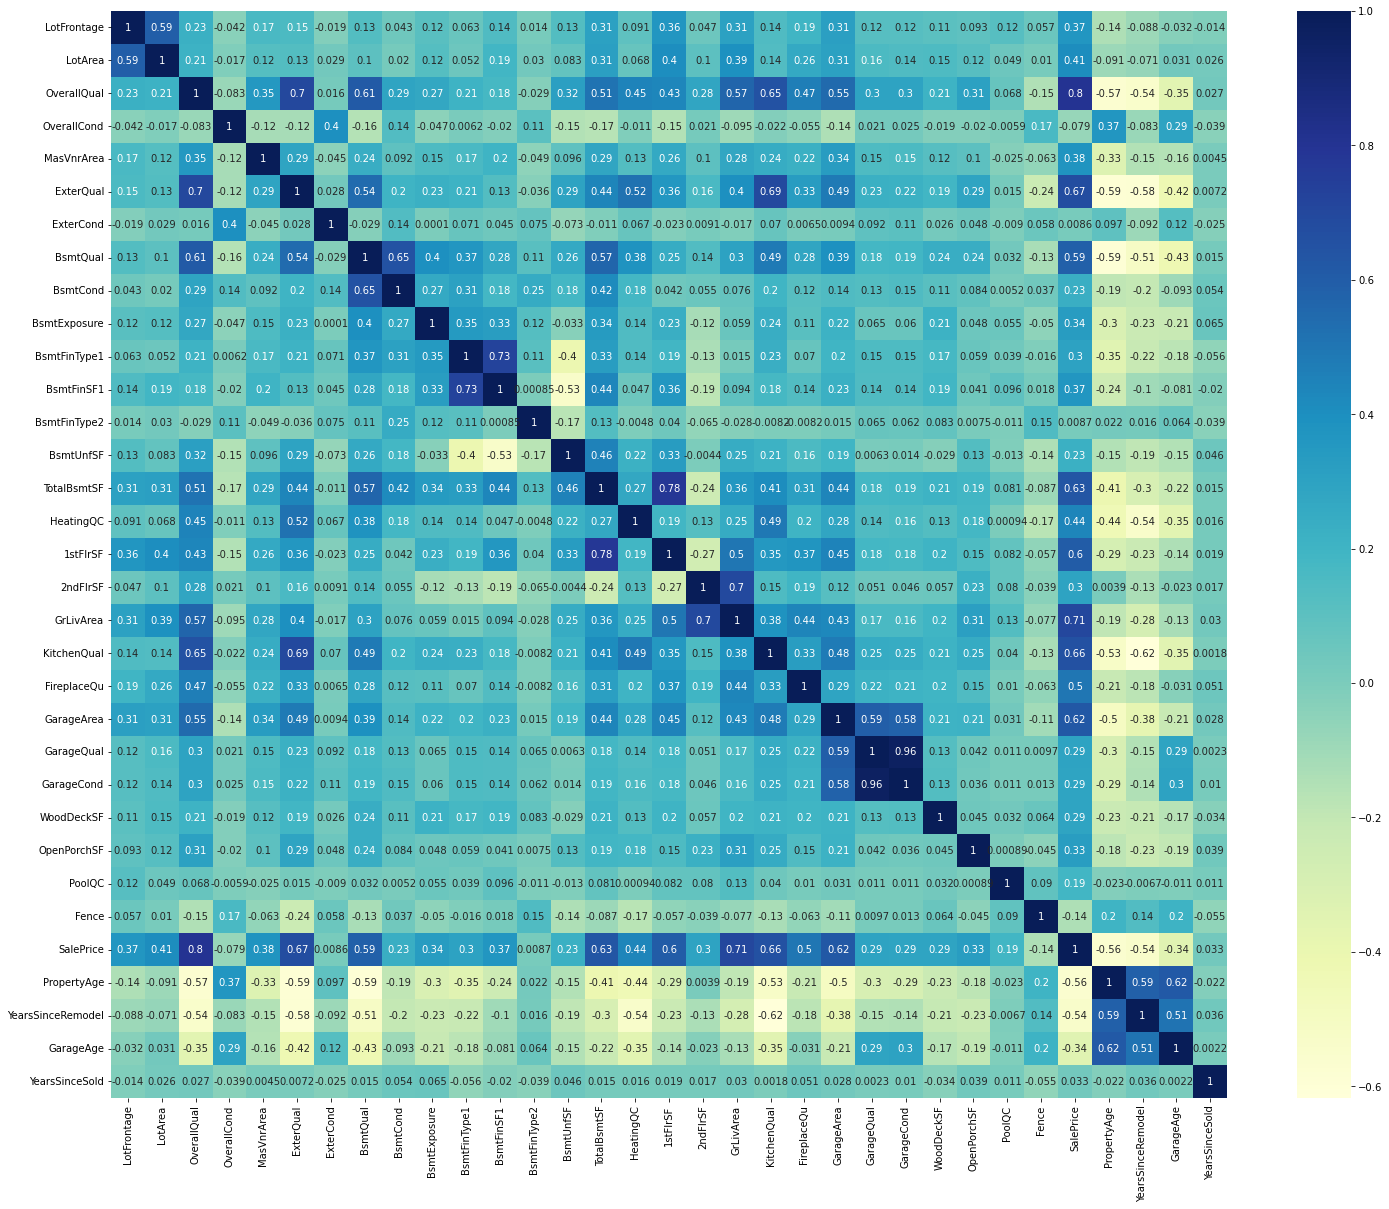

In [121]:
plt.figure(figsize=(25,20))
sns.heatmap(df[numerical_features].corr(),annot = True,cmap="YlGnBu")

In [122]:
df.drop('TotalBsmtSF',axis=1,inplace = True)
#Drop TotalBsmtSF as it has a correlation of 81% with 1stFlrSF

In [123]:
categorical_features, numerical_features = recalculate_feature_list(df)

In [124]:
df.shape

(1296, 52)

In [125]:
#Onehot encoding for categorical variables, using the below for loop code
for i in categorical_features:
    #Create dummies 
    temp = pd.get_dummies(df[i],drop_first=True,prefix = i)
    
    #Concat original dataframe with the new encoded datasets
    df = pd.concat([df,temp],axis =1)
    
    #Drop the columns for which dummy variables have been created
    df = df.drop(i,axis =1)

In [126]:
df.shape

(1296, 172)

In [127]:
import sklearn
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,train_size=0.7, random_state=100)

In [128]:
#Scale the numerical variables

from sklearn.preprocessing import MinMaxScaler

#Instantiate an object

scaler = MinMaxScaler()

# Fit on data (only numeric variables)
num_vars = numerical_features

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,Fence,SalePrice,PropertyAge,YearsSinceRemodel,GarageAge,YearsSinceSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
663,0.496403,0.527047,0.333333,0.428571,0.000000,0.333333,0.5,0.8,0.75,0.75,0.666667,0.438931,0.500000,0.018609,0.333333,0.292674,0.0,0.204491,0.333333,0.0,0.423022,0.6,0.6,0.000000,0.0,0.0,0.75,0.144487,0.292308,0.633333,0.413793,0.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
253,0.460432,0.486168,0.555556,0.714286,0.272727,0.333333,0.5,0.8,0.75,1.00,0.333333,0.128817,0.833333,0.221352,1.000000,0.334485,0.0,0.233704,0.666667,0.0,0.222302,0.6,0.6,0.452446,0.0,0.0,0.75,0.173356,0.353846,0.316667,0.500000,0.75,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1005,0.316547,0.426578,0.444444,0.857143,0.555556,0.666667,0.5,0.8,1.00,0.75,1.000000,0.283874,0.166667,0.190989,0.333333,0.224948,0.0,0.157170,0.333333,0.0,0.235971,0.6,0.6,0.285326,0.0,0.0,0.00,0.161949,0.253846,0.550000,0.387931,0.50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
680,0.208633,0.403545,0.555556,0.428571,0.000000,0.333333,0.5,0.8,0.75,0.25,0.666667,0.259065,0.666667,0.127816,0.333333,0.203525,0.0,0.142202,0.333333,0.6,0.189928,0.6,0.6,0.108696,0.0,0.0,0.00,0.152232,0.230769,0.500000,0.362069,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
194,0.280576,0.352167,0.444444,0.714286,0.000000,0.333333,0.5,0.6,0.75,0.75,0.833333,0.186069,0.166667,0.232125,0.333333,0.183138,0.0,0.127958,0.333333,0.0,0.253237,0.6,0.6,0.000000,0.0,0.0,0.00,0.129700,0.292308,0.633333,0.284483,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0


In [129]:
df_train.shape

(907, 172)

# Training the model -Using the basic Linear regression model

In [130]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [131]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [132]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-271859810708.90067
[-1.50383737e-02  4.53431243e-02  9.32983814e-02  5.83815377e-02
  1.15859872e-02  2.03376594e-02 -2.26501184e-02  3.17431588e-02
 -2.51991518e-02  2.89501005e-02  5.80349128e-03  7.46973930e-02
  1.67371738e-02  2.43589491e-02  7.41099658e-04  1.81669951e-02
 -1.61901942e-02  3.37627205e-01  1.82123702e-02  1.26031957e-02
 -3.64967166e-04  2.87340076e-02  1.41573885e-02  5.80106538e-04
  5.74321282e-03  2.39289554e-01 -1.05413578e-03 -8.41628871e-02
 -8.47664076e-03 -7.41048821e-03 -3.92973715e-04 -3.09159956e-04
 -9.33301046e+09  1.00314571e-02 -1.13833133e-02 -2.43549802e-02
 -2.14324455e-02  1.68098428e-02 -2.52584745e-02 -1.16603074e-02
 -3.17704458e-02 -2.46162332e-02 -5.43908352e-02 -4.73824538e-02
 -3.44584901e-02  3.67429967e-02  3.54453216e-02  3.13870758e-02
  1.85136351e-02 -3.11833405e-03  1.70273836e-03  2.24573015e-03
  7.95134259e-03 -1.01625159e-02 -1.55772567e-02 -2.19213958e-03
  3.35795918e+10  3.90654881e-02  3.90111717e-02  1.41903966e-02
 -1.3

In [ ]:
#Test the model with the test data

In [133]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [134]:
y_test = df_test.pop('SalePrice')

X_test = df_test

In [135]:
y_test.shape

(389,)

In [136]:
y_test_predicted = lm.predict(X_test)

In [137]:
#Write a function to calculate the metrices, instead of writing the same code everytime. 
# Input  - X_train,X_test,y_train,y_test,y_pred_train,y_pred_test
# Output - Prints below information as output and returns a List containing the metrices in the following order
#          - Train R2
#          - Test R2
#          - Train RSS
#          - Test RSS
#          - Train RMSE
#          - Test RMSE

def calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test):

    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print('R2 train:',r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print('R2 test:',r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print('RSS train:',rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print('R2 test:',rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print('MSE train:',mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print('MSE test:',mse_test_lr)
    metric.append(mse_test_lr**0.5)

    return metric

In [138]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric_lr = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.9271873019481689
R2 test: -1.442719843915443e+22
RSS train: 0.6087920044018402
R2 test: 5.087791143229848e+22
MSE train: 0.0006712149993405074
MSE test: 1.3079154609845368e+20


As we can see here that the R2 of the training set is very good i.e. 94%, but for the test set it is practically a zero value. Its a clear case of overfitting. Reason looks like very high number of input features. We can definitely say that this model can't be used. Let's try one more generic model where we try to reduce the number of features using RFE, and see if it helps. 

# Model Using RFE

In [169]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [170]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 87),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 89),
 ('ExterQual', True, 1),
 ('ExterCond', False, 39),
 ('BsmtQual', False, 5),
 ('BsmtCond', False, 6),
 ('BsmtExposure', False, 29),
 ('BsmtFinType1', False, 106),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 59),
 ('BsmtUnfSF', False, 85),
 ('HeatingQC', False, 141),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 127),
 ('GrLivArea', True, 1),
 ('KitchenQual', False, 4),
 ('FireplaceQu', False, 111),
 ('GarageArea', False, 107),
 ('GarageQual', False, 86),
 ('GarageCond', False, 19),
 ('WoodDeckSF', False, 140),
 ('OpenPorchSF', False, 114),
 ('PoolQC', True, 1),
 ('Fence', False, 154),
 ('PropertyAge', True, 1),
 ('YearsSinceRemodel', False, 92),
 ('GarageAge', False, 135),
 ('YearsSinceSold', False, 155),
 ('MSSubClass_30', False, 157),
 ('MSSubClass_40', False, 35),
 ('MSSubClass_45', False, 131),
 ('MSSubClass_50', False, 100),
 ('MSSubClass_60',

In [171]:
col = X_train.columns[rfe.support_]

In [172]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,ExterQual,BsmtFinSF1,1stFlrSF,GrLivArea,PoolQC,PropertyAge,Neighborhood_StoneBr,Foundation_Wood,FullBath_3,TotRmsAbvGrd_12,GarageType_NoGarage,GarageCars_2
663,0.527047,0.333333,0.428571,0.333333,0.438931,0.292674,0.204491,0.0,0.292308,0,0,0,0,0,1
253,0.486168,0.555556,0.714286,0.333333,0.128817,0.334485,0.233704,0.0,0.353846,0,0,0,0,0,0
1005,0.426578,0.444444,0.857143,0.666667,0.283874,0.224948,0.157170,0.0,0.253846,0,0,0,0,0,0
680,0.403545,0.555556,0.428571,0.333333,0.259065,0.203525,0.142202,0.0,0.230769,0,0,0,0,0,0
194,0.352167,0.444444,0.714286,0.333333,0.186069,0.183138,0.127958,0.0,0.292308,0,0,0,0,0,0


In [173]:
lm_rfe = LinearRegression()
lm_rfe.fit(X_train_rfe,y_train)

LinearRegression()

In [174]:
print(lm_rfe.intercept_)
print(lm_rfe.coef_)

-0.07698281826548065
[ 0.05518322  0.18222929  0.05087624  0.08259205  0.07844513  0.06801031
  0.28869118  0.20755016 -0.08655613  0.05088144 -0.05230857  0.04741461
 -0.05931122 -0.00741678 -0.01497946]


In [175]:
y_train_predict_rfe = lm_rfe.predict(X_train_rfe)

In [176]:
r2_score(y_train,y_train_predict_rfe)

0.8714501257129371

In [177]:
X_test_rfe = X_test[col]
y_test_predict_rfe = lm_rfe.predict(X_test_rfe)

In [178]:
r2_score(y_test,y_test_predict_rfe)

0.8610267331403937

In [179]:
#Using statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr_sm = sm.OLS(y_train,X_train_rfe_sm)

lr_model = lr_sm.fit()
final_model = lr_model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     402.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:57:46   Log-Likelihood:                 1768.7
No. Observations:                 907   AIC:                            -3505.
Df Residuals:                     891   BIC:                            -3428.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0770      0.008     -9.647      0.000      -0.093      -0.061
LotArea                  0.0552      0.007      8.026      0.000       0.042       0.069
OverallQual              0.1822      0.013     13.581      0.000       0.156       0.209
OverallCond              0.0509      0.008      6.381      0.000       0.035       0.067
ExterQual                0.0826      0.009      8.708      0.000       0.064       0.101
BsmtFinSF1               0.0784      0.007     11.646      0.000       0.065       0.092
1stFlrSF                 0.0680      0.013      5.232      0.000       0.042       0.094
GrLivArea                0.2887      0.015     19.584      0.000       0.260       0.318
PoolQC                   0.2076      0.029      7.194      0.000       0.151       0.264
PropertyAge             -0.0866      0.008    -11.455      0.000      -0.101      -0.072
Neighborhood_StoneBr     0.0509      0.010      5.314      0.000       0.032       0.070
Foundation_Wood         -0.0523      0.020     -2.582      0.010      -0.092      -0.013
FullBath_3               0.0474      0.009      5.176      0.000       0.029       0.065
TotRmsAbvGrd_12         -0.0593      0.021     -2.864      0.004      -0.100      -0.019
GarageType_NoGarage     -0.0074      0.005     -1.425      0.155      -0.018       0.003
GarageCars_2            -0.0150      0.003     -5.862      0.000      -0.020      -0.010
==============================================================================
Omnibus:                      172.443   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1141.550
Skew:                           0.686   Prob(JB):                    1.30e-248
Kurtosis:                       8.322   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we have build the model with the columns suggested by RFE, we can now try to fine tune the model by manually eliminating the columns based on the P value and VIF. Since this involves multiple steps, let's write a function to drop a feature and rebuild the model, calculate the VIF and show the results. It returns the X, X_sm and model itself in the response which can be used for the next stage of the analysis.

Function Name: rebuild_model_vif

Input - Column name to drop

    X (X dataset)

    y (y target variable)
Output - X (with dropped column)

     X_sm (X with constant)

     lm (linear model)

In [180]:
def rebuild_model_vif(column_name_drop,X,y):
    X = X.drop(column_name_drop,axis =1)
    
    #Build the model again
    X_sm = sm.add_constant(X)

    lr = sm.OLS(y,X_sm)

    lr_model = lr.fit()
    print(lr_model.summary())
    
    #VIF Calculation   

    # VIF dataframe
    vif = pd.DataFrame() #Empty DataFrame
    vif["feature"] = X.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]

    vif["VIF"] = round(vif["VIF"],2)


    print(vif)
    
    #Return the df by dropping the columns
    return X,X_sm,lr_model

In [181]:
#Drop GarageType_NoGarage, high P value
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('GarageType_NoGarage',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     430.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:58:14   Log-Likelihood:                 1767.7
No. Observations:                 907   AIC:                            -3505.
Df Residuals:                     892   BIC:                            -3433.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0798 

In [182]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('Foundation_Wood',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     460.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:58:39   Log-Likelihood:                 1764.3
No. Observations:                 907   AIC:                            -3501.
Df Residuals:                     893   BIC:                            -3433.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0796 

In [183]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('OverallQual',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     399.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:58:58   Log-Likelihood:                 1677.3
No. Observations:                 907   AIC:                            -3329.
Df Residuals:                     894   BIC:                            -3266.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0261 

In [184]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('LotArea',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     406.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:59:30   Log-Likelihood:                 1650.5
No. Observations:                 907   AIC:                            -3277.
Df Residuals:                     895   BIC:                            -3219.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0133 

In [185]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('ExterQual',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     361.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.99e-306
Time:                        11:00:34   Log-Likelihood:                 1571.1
No. Observations:                 907   AIC:                            -3120.
Df Residuals:                     896   BIC:                            -3067.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0311 

In [186]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('TotRmsAbvGrd_12',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     395.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.96e-305
Time:                        11:01:20   Log-Likelihood:                 1565.7
No. Observations:                 907   AIC:                            -3111.
Df Residuals:                     897   BIC:                            -3063.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0320 

In [187]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('1stFlrSF',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     403.1
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.72e-291
Time:                        11:01:58   Log-Likelihood:                 1529.5
No. Observations:                 907   AIC:                            -3041.
Df Residuals:                     898   BIC:                            -2998.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0532 

In [188]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('OverallCond',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     405.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.23e-273
Time:                        11:02:34   Log-Likelihood:                 1484.9
No. Observations:                 907   AIC:                            -2954.
Df Residuals:                     899   BIC:                            -2915.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0938 

In [189]:
#Prediction and model evaluation
X_test_rfe = X_test_rfe.drop(['GarageType_NoGarage','Foundation_Wood','OverallQual','LotArea','ExterQual','TotRmsAbvGrd_12',
                             '1stFlrSF','OverallCond'],axis = 1)
X_test_rfe_sm = sm.add_constant(X_test_rfe)
y_test_rfe_pred = final_model.predict(X_test_rfe_sm)

In [190]:
test_r2 = r2_score(y_test, y_test_rfe_pred)
test_r2

0.7428321293769027

In [191]:
y_pred_train = final_model.predict(X_train_rfe_sm)
y_pred_test = final_model.predict(X_test_rfe_sm)

metric_rfe = calculate_metrices(X_train_rfe_sm,X_test_rfe_sm,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.7596460965206677
R2 test: 0.7428321293769027
RSS train: 2.0096156107390586
R2 test: 0.9069095569715886
MSE train: 0.0022156732202194694
MSE test: 0.00233138703591668


In [192]:
#Validate the assumption
res = y_test - y_test_rfe_pred

<AxesSubplot:ylabel='Density'>

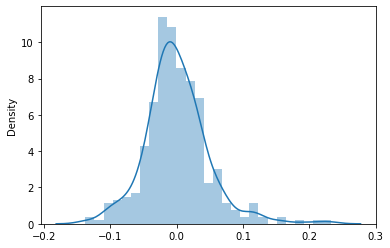

In [193]:
sns.distplot(res)

<AxesSubplot:xlabel='SalePrice'>

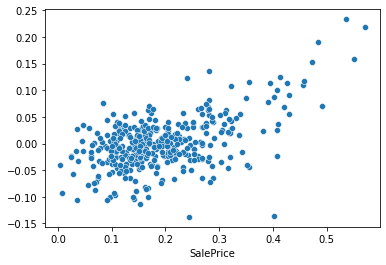

In [194]:
sns.scatterplot(x = y_test, y = res)

Looks like the error terms are not faily scattered and show some weak trend which is not a good sign, if the number of data points are increase it may show some pattern. 

So using the normal linear regression models, we can see some of the problems of the Linear regression models i.e. overfitting due to high number of features, and error terms not having constant variance and probably some auto - correlation too. 

Also the fact that using the RFE, we have reduced the number of features to 15, while we had 250+ features after creating dummies and 50+ features after the EDA. It also indictaes that we might still have some more scope to improve the model further than the one built by RFE. Let's see if Ridge and Lasso can improve this for us. 

# Ridge and Lasso Regression
Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [227]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        #scoring= 'r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [228]:
ridge_res = pd.DataFrame(model_cv.cv_results_)
ridge_res = ridge_res[ridge_res['param_alpha']<=10]
ridge_res.head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012792,0.001327,0.006795,0.000748,0.0001,{'alpha': 0.0001},-0.022176,-0.022748,-0.023629,-0.021881,-0.026451,-0.023377,0.001649,23,-0.017473,-0.017911,-0.017560,-0.018204,-0.016837,-0.017597,0.000461
1,0.014108,0.002795,0.005797,0.000748,0.001,{'alpha': 0.001},-0.022173,-0.022745,-0.023620,-0.021838,-0.026446,-0.023364,0.001655,22,-0.017473,-0.017911,-0.017560,-0.018207,-0.016838,-0.017598,0.000461
2,0.009777,0.000761,0.005224,0.000390,0.01,{'alpha': 0.01},-0.022142,-0.022722,-0.023546,-0.021564,-0.026428,-0.023280,0.001705,21,-0.017476,-0.017909,-0.017565,-0.018225,-0.016847,-0.017604,0.000463
3,0.009971,0.000865,0.004593,0.000798,0.05,{'alpha': 0.05},-0.022012,-0.022637,-0.023302,-0.021283,-0.026384,-0.023124,0.001762,20,-0.017497,-0.017902,-0.017593,-0.018261,-0.016875,-0.017625,0.000461
4,0.010394,0.000800,0.004624,0.000516,0.1,{'alpha': 0.1},-0.021882,-0.022541,-0.023203,-0.021118,-0.026363,-0.023022,0.001808,19,-0.017534,-0.017905,-0.017618,-0.018286,-0.016897,-0.017648,0.000458
5,0.010044,0.000101,0.005198,0.000399,0.2,{'alpha': 0.2},-0.021676,-0.022377,-0.023071,-0.020894,-0.026330,-0.022869,0.001875,16,-0.017618,-0.017927,-0.017659,-0.018334,-0.016935,-0.017695,0.000457
6,0.009942,0.000635,0.004565,0.000470,0.3,{'alpha': 0.3},-0.021533,-0.022236,-0.022983,-0.020804,-0.026316,-0.022774,0.001913,14,-0.017705,-0.017955,-0.017692,-0.018380,-0.016972,-0.017741,0.000458
7,0.010196,0.000748,0.004795,0.000747,0.4,{'alpha': 0.4},-0.021412,-0.022111,-0.022927,-0.020746,-0.026303,-0.022700,0.001942,13,-0.017785,-0.017983,-0.017736,-0.018420,-0.017013,-0.017787,0.000456
8,0.010392,0.000800,0.005197,0.000399,0.5,{'alpha': 0.5},-0.021298,-0.021996,-0.022889,-0.020701,-0.026291,-0.022635,0.001968,11,-0.017863,-0.018017,-0.017784,-0.018461,-0.017055,-0.017836,0.000455
9,0.015389,0.004497,0.008395,0.003978,0.6,{'alpha': 0.6},-0.021188,-0.021897,-0.022852,-0.020676,-0.026280,-0.022579,0.001990,9,-0.017935,-0.018054,-0.017827,-0.018494,-0.017093,-0.017881,0.000454


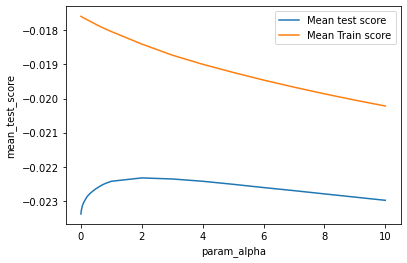

In [229]:
sns.lineplot(data = ridge_res, x = ridge_res['param_alpha'], y = ridge_res['mean_test_score'])
sns.lineplot(data = ridge_res, x = ridge_res['param_alpha'], y = ridge_res['mean_train_score'])
plt.legend(['Mean test score','Mean Train score'],loc='upper right')
plt.show()

#As we can see that the on the test data the error flattens out at around 4.0, this we can choose as the optimal 
#lambda

In [230]:
# Printing the best hyperparameter alpha, let's check what is the best parameter as per the GridSearch, 
print(model_cv.best_params_)

{'alpha': 2.0}


As per Gridsearch also, the optimal value of alpha is 3.0, let's build the model with alpha = 3

In [231]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 2
ridge_3 = Ridge(alpha=alpha)

ridge_3.fit(X_train, y_train)
print(ridge_3.intercept_)
print(ridge_3.coef_)

-0.02104980850366886
[ 2.55133291e-03  4.29464957e-02  8.01730019e-02  4.39083881e-02
  1.30163905e-02  2.84381623e-02 -1.39428421e-02  2.91958068e-02
 -2.04031400e-02  3.15830828e-02  6.62807585e-03  7.32868920e-02
  1.65065747e-02  2.64868388e-02  4.99195072e-03  9.88698020e-02
  5.51471427e-02  9.87966155e-02  2.54583105e-02  1.13773341e-02
  2.13798423e-02  6.75445906e-03  1.17185229e-02  3.61429393e-03
  1.07590198e-02  9.33272847e-02  2.78575715e-03 -4.93491223e-02
 -1.06412816e-02 -8.49281985e-03  8.75487357e-07 -4.66208599e-03
  0.00000000e+00  3.52748547e-04 -2.72909279e-03  2.91927322e-03
 -5.50604794e-03  5.37156322e-03 -7.16015317e-03 -1.45261086e-03
 -1.87760020e-02 -1.85123698e-02 -2.24074121e-02 -9.73330168e-03
 -1.77796444e-02  1.35959790e-02  1.00548869e-02  1.35140183e-02
  6.29151762e-03 -4.70728519e-03  1.52278045e-03  8.83844372e-04
  2.65607712e-03 -8.27650057e-03 -1.30217546e-02 -2.09099624e-03
  0.00000000e+00  1.38026319e-02  1.74835290e-02 -5.76879055e-04
 -1.

In [232]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_3.predict(X_train)
y_pred_test = ridge_3.predict(X_test)

metric_ridge_3 = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.9220817716805206
R2 test: 0.9077370602929158
RSS train: 0.6514796960866525
R2 test: 0.32536779019833384
MSE train: 0.0007182797090260777
MSE test: 0.0008364210544944315


In [233]:
#Fitting Ridge model for alpha = 6 and printing coefficients which have been penalised
alpha = 4
ridge_6 = Ridge(alpha=alpha)

ridge_6.fit(X_train, y_train)
print(ridge_6.intercept_)
print(ridge_6.coef_)

-0.004159265746174923
[ 8.24629161e-03  4.11345302e-02  7.23111613e-02  3.69695106e-02
  1.33884640e-02  3.01833177e-02 -1.01372373e-02  2.72637042e-02
 -1.51918947e-02  3.18379956e-02  8.36259469e-03  6.71109792e-02
  1.31173756e-02  2.47585077e-02  6.02408635e-03  8.12950746e-02
  4.55153629e-02  8.05584414e-02  2.77262599e-02  1.26612106e-02
  2.27542521e-02  6.26812824e-03  8.67539334e-03  3.56417552e-03
  1.23391271e-02  6.22471147e-02  3.39074647e-03 -3.68491418e-02
 -1.26224167e-02 -7.69322834e-03  1.00680079e-04 -6.20783575e-03
  0.00000000e+00  7.81198577e-04 -9.73495058e-04  6.14820970e-03
 -2.85081671e-03  5.02764613e-03 -4.34955856e-03 -1.69769775e-03
 -1.48534926e-02 -1.56624018e-02 -1.66082499e-02 -6.80878130e-03
 -1.49359200e-02  9.53268796e-03  6.47870834e-03  1.00194966e-02
  3.05327917e-03 -4.27807774e-03  1.21917922e-03  2.83762424e-04
  2.77812767e-03 -7.44475361e-03 -9.87102456e-03 -1.65869173e-03
  0.00000000e+00  1.08854054e-02  1.59362350e-02 -7.59228283e-04
 -1

In [234]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_6.predict(X_train)
y_pred_test = ridge_6.predict(X_test)

metric_ridge_6 = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.9155043920922482
R2 test: 0.9060039423205658
RSS train: 0.7064736217396437
R2 test: 0.3314796783151312
MSE train: 0.0007789124826236424
MSE test: 0.0008521328491391547


# Lasso

In [235]:
params = {'alpha': [0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [236]:
lasso_res = pd.DataFrame(model_cv.cv_results_)
lasso_res = lasso_res[lasso_res['param_alpha']<=.05]
lasso_res.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.042576,0.008566,0.006597,0.001355,0.0001,{'alpha': 0.0001},-0.020815,-0.021389,-0.022202,-0.020258,-0.024665,-0.021866,0.001541,1,-0.018640,-0.018729,-0.018541,-0.019104,-0.017785,-0.018560,0.000432
1,0.012847,0.001482,0.005397,0.000489,0.001,{'alpha': 0.001},-0.023448,-0.024209,-0.024759,-0.022359,-0.027484,-0.024452,0.001716,2,-0.023005,-0.022974,-0.022870,-0.023164,-0.022943,-0.022991,0.000097
2,0.010182,0.000735,0.005395,0.001018,0.01,{'alpha': 0.01},-0.048874,-0.044124,-0.052496,-0.048354,-0.056358,-0.050041,0.004127,3,-0.050078,-0.049314,-0.048442,-0.049919,-0.049400,-0.049431,0.000574
3,0.010197,0.000399,0.005194,0.000747,0.05,{'alpha': 0.05},-0.071891,-0.064128,-0.071578,-0.069054,-0.073670,-0.070064,0.003313,4,-0.069122,-0.071940,-0.069319,-0.070593,-0.068622,-0.069919,0.001201


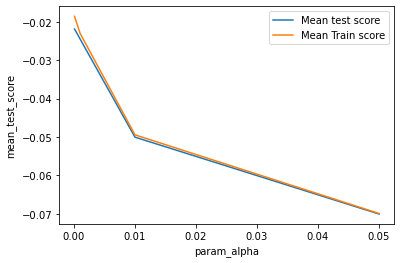

In [237]:
sns.lineplot(data = lasso_res, x = lasso_res['param_alpha'], y = lasso_res['mean_test_score'])
sns.lineplot(data = lasso_res, x = lasso_res['param_alpha'], y = lasso_res['mean_train_score'])
plt.legend(['Mean test score','Mean Train score'],loc='upper right')
plt.show()

In [238]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


Here the optimal value as per the grid search algorithm is 0.0001, if we increase the lambda, more number of features could be eliminated without compromising on the error, let's try that.

In [239]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso_0001 = Lasso(alpha=alpha)
        
lasso_0001.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [240]:
print(lasso_0001.intercept_)
print(lasso_0001.coef_)

#We could see that many co efficents are zero, if we increase the lambda, to 0.0002, then more features could be eliminated

-0.053737005916278224
[-0.00000000e+00  4.05685056e-02  9.72432269e-02  4.50221800e-02
  9.69207603e-03  2.98846825e-02 -0.00000000e+00  1.65950204e-02
 -8.69088501e-03  2.92317269e-02  3.21281453e-03  6.38060513e-02
  6.24933636e-03  6.53493438e-03  1.24960819e-03  5.59049449e-02
  0.00000000e+00  2.70122732e-01  2.64340702e-02  9.56615133e-03
  1.05768316e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.86487024e-03  1.66743411e-01  0.00000000e+00 -5.84169438e-02
 -8.51405395e-03 -5.01555320e-03 -0.00000000e+00 -1.76221143e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.55360437e-03
 -0.00000000e+00  0.00000000e+00 -6.23153445e-04 -0.00000000e+00
 -1.87977354e-02 -1.34620965e-02 -1.49885552e-02 -0.00000000e+00
 -1.03875641e-02  0.00000000e+00 -0.00000000e+00  3.31056187e-03
 -0.00000000e+00 -1.88404112e-04 -0.00000000e+00  0.00000000e+00
  2.46361413e-03 -2.39454382e-03 -0.00000000e+00 -5.06309953e-04
  0.00000000e+00  4.64492983e-03  2.08031565e-02  5.20611909e-04
 -3

In [241]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_0001.predict(X_train)
y_pred_test = lasso_0001.predict(X_test)

metric_lasso_0001 = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.9202280170670036
R2 test: 0.9068787099023377
RSS train: 0.6669790666226658
R2 test: 0.32839478641897146
MSE train: 0.0007353683204219028
MSE test: 0.0008442025357814177


In [242]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0002

lasso_0002 = Lasso(alpha=alpha)
        
lasso_0002.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [211]:
print(lasso_0002.intercept_)
print(lasso_0002.coef_)

-0.053889875402449494
[ 0.00000000e+00  4.08740177e-02  1.05016063e-01  3.72898359e-02
  5.14391601e-03  3.42397151e-02 -0.00000000e+00  1.05026741e-02
 -0.00000000e+00  2.77433808e-02  2.20790079e-03  6.20162362e-02
  0.00000000e+00  0.00000000e+00  1.70453835e-03  6.91775900e-02
  0.00000000e+00  2.51943274e-01  3.00956013e-02  5.84206332e-03
  8.19702531e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.09241694e-01  0.00000000e+00 -4.73366964e-02
 -9.53434969e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.05294583e-02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.32167849e-02 -6.73066495e-03 -6.70400312e-03 -0.00000000e+00
 -4.82246340e-03  0.00000000e+00 -0.00000000e+00  9.15290815e-04
 -1.15730872e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.25741597e-04 -0.00000000e+00 -0.00000000e+00 -3.56285750e-04
  0.00000000e+00  0.00000000e+00  1.86157566e-02  0.00000000e+00
 -6

In [243]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_0002.predict(X_train)
y_pred_test = lasso_0002.predict(X_test)

metric_lasso_0002 = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.9114714387484885
R2 test: 0.9042826027139448
RSS train: 0.7401934235805107
R2 test: 0.3375500297017794
MSE train: 0.0008160897724151164
MSE test: 0.0008677378655572735


In [244]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rfe_metric = pd.Series(metric_rfe, name = 'RFE method')
rg_1_metric = pd.Series(metric_ridge_3, name = 'Ridge Regression 3')
rg_2_metric = pd.Series(metric_ridge_6, name = 'Ridge Regression 6')
ls_1_metric = pd.Series(metric_lasso_0001, name = 'Lasso Regression .0001')
ls_2_metric = pd.Series(metric_lasso_0002, name = 'Lasso Regression .0002')

final_metric = pd.concat([lr_metric,rfe_metric, rg_1_metric,rg_2_metric, ls_1_metric,ls_2_metric], axis = 1)

final_metric

,Metric,Linear Regression,RFE method,Ridge Regression 3,Ridge Regression 6,Lasso Regression .0001,Lasso Regression .0002
0,R2 Score (Train),9.271873e-01,0.759646,0.922082,0.915504,0.920228,0.911471
1,R2 Score (Test),-1.442720e+22,0.742832,0.907737,0.906004,0.906879,0.904283
2,RSS (Train),6.087920e-01,2.009616,0.651480,0.706474,0.666979,0.740193
3,RSS (Test),5.087791e+22,0.906910,0.325368,0.331480,0.328395,0.337550
4,MSE (Train),2.590782e-02,0.047071,0.026801,0.027909,0.027118,0.028567
5,MSE (Test),1.143641e+10,0.048284,0.028921,0.029191,0.029055,0.029457


As we can see in the above table that of all the models that we have tried, normal Linear regression is the worst performing with a negative R2 on unseen test data, RFE doe's a little better with 86% R2, and also reduces the overall error in the model. 
But implementing Ridge and Lasso regularization really improves the overall model. 

If we compare the Ridge (with alpha 3 and 6) and Lasso (alpha .0001 and .0002)Lasso with alpha .0001 provides the best overall results. It has highest test R2 and lowest test error. 

# Lets observe the changes in the coefficients after regularization

In [214]:
df.pop('SalePrice')
betas = pd.DataFrame(index=df.columns)

In [215]:
betas.rows = df.columns

In [216]:
betas['Linear'] = lm.coef_
betas['Ridge_3'] = ridge_3.coef_
betas['Ridge_6'] = ridge_3.coef_
betas['Lasso_0001'] = lasso_0001.coef_
betas['Lasso_0002'] = lasso_0002.coef_

In [217]:
betas['Ridge3_abs'] = betas['Ridge_3'].apply(lambda x:abs(x))
betas['Ridge6_abs'] = betas['Ridge_6'].apply(lambda x:abs(x))
betas['Lasso_0001_abs'] = betas['Lasso_0001'].apply(lambda x:abs(x))
betas['Lasso_0002_abs'] = betas['Lasso_0002'].apply(lambda x:abs(x))

In [218]:
betas

,Linear,Ridge_3,Ridge_6,Lasso_0001,Lasso_0002,Ridge3_abs,Ridge6_abs,Lasso_0001_abs,Lasso_0002_abs
LotFrontage,-1.503837e-02,0.005920,0.005920,-0.000000,0.000000,0.005920,0.005920,0.000000,0.000000
LotArea,4.534312e-02,0.041991,0.041991,0.040569,0.040874,0.041991,0.041991,0.040569,0.040874
OverallQual,9.329838e-02,0.076034,0.076034,0.097243,0.105016,0.076034,0.076034,0.097243,0.105016
OverallCond,5.838154e-02,0.040010,0.040010,0.045022,0.037290,0.040010,0.040010,0.045022,0.037290
MasVnrArea,1.158599e-02,0.013235,0.013235,0.009692,0.005144,0.013235,0.013235,0.009692,0.005144
ExterQual,2.033766e-02,0.029499,0.029499,0.029885,0.034240,0.029499,0.029499,0.029885,0.034240
ExterCond,-2.265012e-02,-0.011802,-0.011802,-0.000000,-0.000000,0.011802,0.011802,0.000000,0.000000
BsmtQual,3.174316e-02,0.028163,0.028163,0.016595,0.010503,0.028163,0.028163,0.016595,0.010503
BsmtCond,-2.519915e-02,-0.017530,-0.017530,-0.008691,-0.000000,0.017530,0.017530,0.008691,0.000000
BsmtExposure,2.895010e-02,0.031796,0.031796,0.029232,0.027743,0.031796,0.031796,0.029232,0.027743


In [219]:
#Let's find the top 10 features as per Ridge and Lasso
betas_top_10_ridge_3 = betas.sort_values('Ridge3_abs',ascending=False).index[:10]
betas_top_10_ridge_6 = betas.sort_values('Ridge6_abs',ascending=False).index[:10]
betas_top_10_lasso_0001 = betas.sort_values('Lasso_0001_abs',ascending=False).index[:10]
betas_top_10_lasso_0002 = betas.sort_values('Lasso_0002_abs',ascending=False).index[:10]

# Final Conclusion: Based on the analysis, below are the top 10 models as per the Ridge and Lasso models

In [220]:
print(betas_top_10_ridge_3)
print(betas_top_10_ridge_6)

Index(['1stFlrSF', 'GrLivArea', 'OverallQual', 'PoolQC', 'BsmtFinSF1',
       '2ndFlrSF', 'Neighborhood_StoneBr', 'FullBath_3', 'LotArea',
       'PropertyAge'],
      dtype='object')
Index(['1stFlrSF', 'GrLivArea', 'OverallQual', 'PoolQC', 'BsmtFinSF1',
       '2ndFlrSF', 'Neighborhood_StoneBr', 'FullBath_3', 'LotArea',
       'PropertyAge'],
      dtype='object')


In [221]:
print(betas_top_10_lasso_0001)
print(betas_top_10_lasso_0002)

Index(['GrLivArea', 'PoolQC', 'OverallQual', 'BsmtFinSF1', 'PropertyAge',
       '1stFlrSF', 'Neighborhood_StoneBr', 'OverallCond', 'FullBath_3',
       'LotArea'],
      dtype='object')
Index(['GrLivArea', 'PoolQC', 'OverallQual', '1stFlrSF', 'BsmtFinSF1',
       'PropertyAge', 'FullBath_3', 'Neighborhood_StoneBr', 'LotArea',
       'OverallCond'],
      dtype='object')


As we could see that for Ridge the features are same for both alpha values, but for Lasso there is a difference in the features selected for differenr values of alpha 

Based on our analysis, we have selected lasso regularization with alpha .0001. So our final model will be as follows

In [222]:
op = ''
for i,k in zip(list(betas['Lasso_0001_abs']),range(len(betas.index))):
    if i != 0:    
        op = op + f"{round(i,5)} * {betas.index[k]} + "

op = f"{round(lasso_0001.intercept_,5)} +" + op
    
print(op[:-2])

-0.05374 +0.04057 * LotArea + 0.09724 * OverallQual + 0.04502 * OverallCond + 0.00969 * MasVnrArea + 0.02988 * ExterQual + 0.0166 * BsmtQual + 0.00869 * BsmtCond + 0.02923 * BsmtExposure + 0.00321 * BsmtFinType1 + 0.06381 * BsmtFinSF1 + 0.00625 * BsmtFinType2 + 0.00653 * BsmtUnfSF + 0.00125 * HeatingQC + 0.0559 * 1stFlrSF + 0.27012 * GrLivArea + 0.02643 * KitchenQual + 0.00957 * FireplaceQu + 0.01058 * GarageArea + 0.00386 * OpenPorchSF + 0.16674 * PoolQC + 0.05842 * PropertyAge + 0.00851 * YearsSinceRemodel + 0.00502 * GarageAge + 0.00176 * MSSubClass_30 + 0.00755 * MSSubClass_60 + 0.00062 * MSSubClass_80 + 0.0188 * MSSubClass_90 + 0.01346 * MSSubClass_120 + 0.01499 * MSSubClass_160 + 0.01039 * MSSubClass_190 + 0.00331 * MSZoning_RL + 0.00019 * LotShape_IR2 + 0.00246 * LotConfig_CulDSac + 0.00239 * LotConfig_FR2 + 0.00051 * LotConfig_Inside + 0.00464 * Neighborhood_BrDale + 0.0208 * Neighborhood_BrkSide + 0.00052 * Neighborhood_ClearCr + 0.00398 * Neighborhood_CollgCr + 0.03715 * Neig